In [5]:
import time
import random
import numpy as np


In [6]:
from qiskit import QuantumProgram, register, available_backends, get_backend, execute
import Qconfig

In [7]:
import tools.Experiment_tools as exptool
import tools.Ploting_tools as plottool

In [8]:
qprogram = QuantumProgram()
register(Qconfig.APItoken)
#qprogram.set_api(Qconfig.APItoken, Qconfig.config["url"])

In [9]:
#api = qprogram.get_api()

In [10]:
available_backends()

['ibmqx4',
 'ibmqx5',
 'ibmq_qasm_simulator',
 'local_unitary_simulator',
 'local_statevector_simulator',
 'local_qasm_simulator',
 'ibmqx2',
 'local_clifford_simulator']

In [11]:
IBMQX4 = get_backend('ibmqx4')
IBMQX4.status
#print(qprogram.get_backend_status("ibmqx4"))
#api.get_my_credits()

{'available': True, 'name': 'ibmqx4', 'pending_jobs': 23}

In [12]:
config = IBMQX4.configuration
config

{'allow_q_object': False,
 'basis_gates': 'u1,u2,u3,cx,id',
 'chip_name': 'Raven',
 'coupling_map': [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]],
 'description': '5 qubit transmon bowtie chip 3',
 'gate_set': 'SU2+CNOT',
 'local': False,
 'n_qubits': 5,
 'name': 'ibmqx4',
 'online_date': '2017-09-18T00:00:00.000Z',
 'simulator': False,
 'url': 'https://ibm.biz/qiskit-ibmqx4',
 'version': '1.2.0'}

In [13]:
n = config['n_qubits']
q = qprogram.create_quantum_register("q",n)
c = qprogram.create_classical_register("c",n)

In [14]:
circuit_names = exptool.all_circuits(qprogram,config['coupling_map'])

In [15]:
rand_perm_names = np.random.permutation(circuit_names)
batches = [list(rand_perm_names[50*j:50*(j+1)]) for j in range(0,1+int(len(circuit_names)/50))]
compiled_qobj_list = [qprogram.compile(batch, 
                                       backend='ibmqx4', 
                                       config=None,
                                       basis_gates=None, 
                                       coupling_map=None, 
                                       initial_layout=None, 
                                       shots=8192, 
                                       max_credits=5, 
                                       seed=None) for batch in batches]

In [16]:
res = qprogram.run_batch(compiled_qobj_list)
res

Got a 502 code response to https://quantumexperience.ng.bluemix.net/api/Jobs/5b56bba78e405d00383f3908?access_token=GJG7UAYFCMstmeQ1AGa5WETwCAWHvJFUxWZ3QG8M3AY7YUv4U9xSdmax9ddpQq59: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to https://quantumexperience.ng.bluemix.net/api/Jobs/5b56bba75bee08003a1093f5?access_token=GJG7UAYFCMstmeQ1AGa5WETwCAWHvJFUxWZ3QG8M3AY7YUv4U9xSdmax9ddpQq59: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to https://quantumexperience.ng.bluemix.net/api/Jobs/5b56bba78e405d00383f3908?access_token=GJG7UAYFCMstmeQ1AGa5WETwCAWHvJFUxWZ3QG8M3AY7YUv4U9xSdmax9ddpQq59: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to https://quantumexperience.ng.bluemix.net/api/Jobs/5b56bba78e405d00383f3908?access_token=GJG7UAYFCMstmeQ1AGa5WETwCAWHvJFUxWZ3QG8M3AY7YUv4U9xSdmax9ddpQq59: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got 

In [20]:
res0 = res[0]
print(res0.get_names())
res0.get_job_id()

['bMZ2|0+>[3, 2]', 'bMX1|00>[3, 4]', 'eMX1|0+>', 'bM|0+>[2, 0]', 'bMX1|00>+|11>[1, 0]', 'bMX1|00>+|11>[2, 1]', 'eMX2-CZ-HHS-X1|00>ftv1', 'bMZ2-HHS|00>[3, 2]', 'bMHHS|00>[1, 0]', 'eMZ1-HHS|00>ftv1', 'eMX2|00>ftv2', 'bMX2-X1|00>[1, 0]', 'bMCZ-HHS|00>[4, 2]', 'bMX2|00>[1, 0]', 'bMCZ-Z2-HHS|00>[3, 4]', 'bM|00>[1, 0]', 'bMX1|00>+|11>[2, 0]', 'bMCZ-Z1-HHS|00>[2, 0]', 'bM|00>+|11>[3, 4]', 'bMX1|0+>[2, 1]', 'bMX2-CZ-HHS-X1|00>[4, 2]', 'bMX2-X1|00>[3, 2]', 'bMCZ-Z2-HHS|00>[2, 0]', 'bMZ2|00>+|11>[1, 0]', 'bM|0+>[3, 4]', 'bMHHS|00>[4, 2]', 'eMX2|00>nftv1', 'eMCZ-Z1-HHS|00>ftv1', 'bMZ2-X1|0+>[2, 0]', 'bMZ2-Z1-HHS|00>[1, 0]', 'bMX2|00>[4, 2]', 'bMCZ-Z2-HHS|00>[1, 0]', 'eMHHS|00>ftv1', 'bMX2-Z2|00>+|11>[3, 2]', 'eMZ2|0+>', 'bMX2-CZ-HHS-X1|00>[2, 0]', 'bMHHS|00>[3, 4]', 'bMX2-Z2|00>+|11>[4, 2]', 'bMZ2-HHS|00>[1, 0]', 'bMZ2-X1|0+>[3, 2]', 'bMZ1-HHS|00>[3, 4]', 'bMX1|00>+|11>[3, 4]', 'eMCZ-HHS|00>ftv2', 'bMCZ-HHS|00>[1, 0]', 'bMX1|00>[2, 1]', 'bMZ2-HHS|00>[3, 4]', 'bM|00>[3, 4]', 'eMCZ-Z2-HHS|00>nftv1'

'5b56bba78e405d00383f3908'

In [21]:
api = qprogram.get_api()

/usr/lib/python3.6/site-packages/qiskit/_quantumprogram.py:733: DeprecationWarning: get_api() will be deprecated in upcoming versions (>0.5.0). Using qiskit.register() instead is recommended.
  "Using qiskit.register() instead is recommended.", DeprecationWarning)


In [30]:
for r in res:
    for cirq in r.get_names():
        print(cirq, r.get_counts(cirq))

bMZ2|0+>[3, 2] {'10000': 75, '10001': 2, '10010': 2, '10100': 57, '10110': 2, '11100': 21, '00000': 4027, '00001': 34, '00010': 36, '00011': 1, '00100': 2461, '00101': 25, '00110': 64, '00111': 1, '01000': 67, '01010': 4, '01100': 1288, '01101': 12, '01110': 11, '01111': 2}
bMX1|00>[3, 4] {'10000': 13, '10100': 1, '11000': 104, '11001': 1, '11010': 1, '11100': 1, '00000': 687, '00001': 6, '00010': 11, '00100': 16, '00110': 1, '01000': 7122, '01001': 61, '01010': 87, '01011': 1, '01100': 77, '01101': 1, '01110': 1}
eMX1|0+> {'10000': 474, '10001': 8, '10010': 1305, '10011': 8, '10100': 24, '10110': 70, '11000': 1597, '11001': 17, '11010': 254, '11011': 2, '11100': 73, '11101': 2, '11110': 40, '00000': 100, '00001': 2, '00010': 249, '00011': 3, '00100': 443, '00101': 8, '00110': 1058, '00111': 14, '01000': 296, '01001': 3, '01010': 52, '01011': 1, '01100': 1345, '01101': 7, '01110': 731, '01111': 6}
bM|0+>[2, 0] {'10000': 66, '10001': 63, '10010': 3, '10011': 1, '11000': 1, '11001': 4, '

In [29]:
qiskit.wrapper.remote_backends()

['ibmq_qasm_simulator', 'ibmqx4', 'ibmqx2', 'ibmqx5']

In [20]:
print(qprogram.get_backend_status("ibmqx4"))
api.get_my_credits()

{'available': True, 'busy': False, 'pending_jobs': 9, 'backend': 'ibmqx4'}


{'maxUserType': 150, 'promotional': 100, 'remaining': 110}

In [18]:
print(exptool.fetch_previous('timed_out.txt',api))
print(exptool.fetch_previous('completed.txt',api))

FileNotFoundError: [Errno 2] No such file or directory: 'data/timed_out.txt'

In [17]:
dict_cn = exptool.get_qasm_name_dict(compiled_qobj_list)

In [18]:
print(exptool.process_all_api_dumps('data/completed_timed_out.txt','data/already_processed.txt',dict_cn))
print(exptool.process_all_api_dumps('data/completed_completed.txt','data/already_processed.txt',dict_cn))
print(exptool.process_all_api_dumps('data/completed_timed_out_old.txt','data/already_processed.txt',dict_cn))
print(exptool.process_all_api_dumps_verif_nftv2('data/completed_timed_out_verif_nftv2.txt','data/already_processed_verif_nftv2.txt',dict_cn))

0
0
0
0


In [19]:
importlib.reload(exptool)
importlib.reload(plottool)
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [70]:
#exptool.plot_everything_raw('data/Processed_data/')

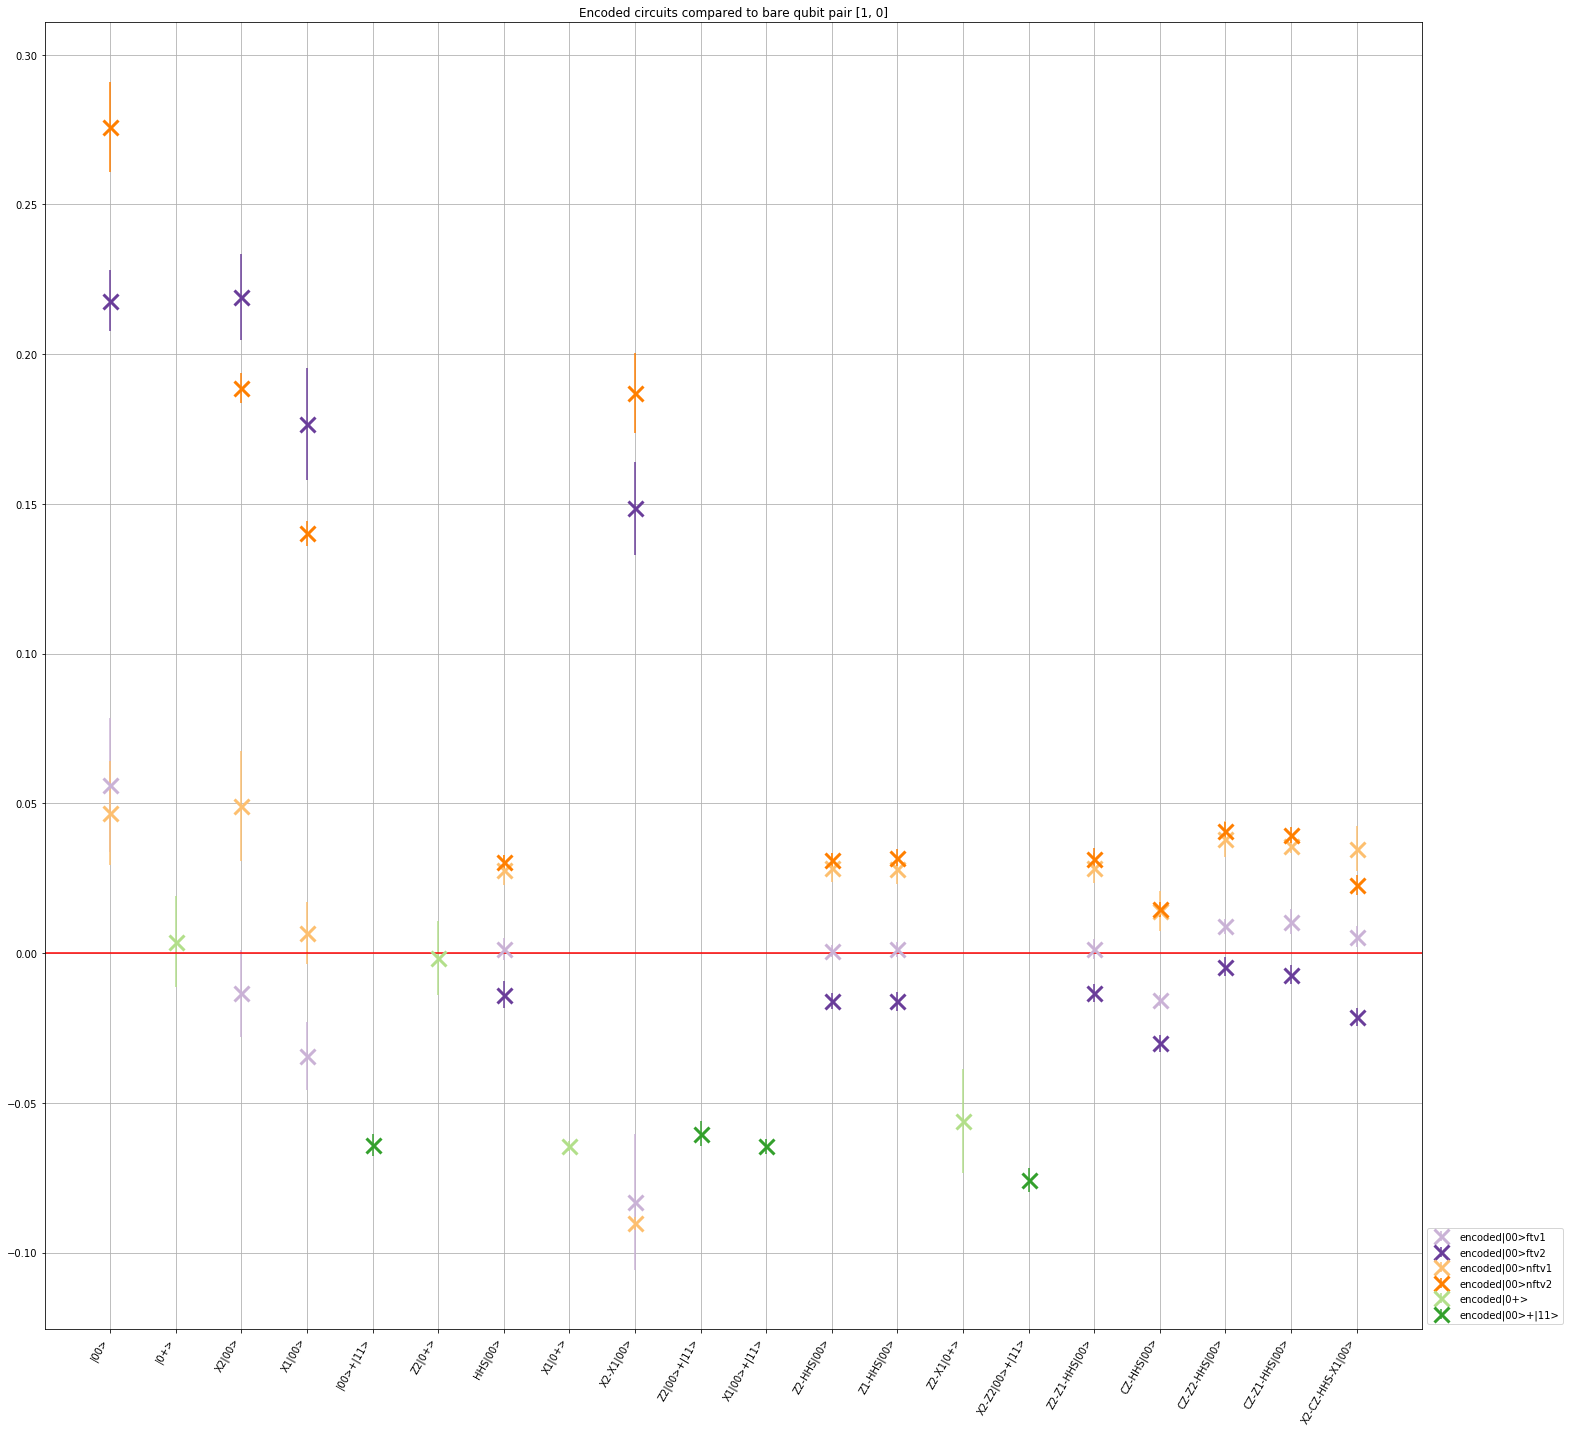

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 -0.005037053221274681
encoded|00>ftv2 0.0533187744393378
encoded|00>nftv1 0.02067758882668912
encoded|00>nftv2 0.08619325798167579
encoded|0+> -0.02953277162089072
encoded|00>+|11> -0.066105092960456


In [23]:
plottool.plot_everything_averaged_diff('data/Processed_data/', save_data_folder_pref='data/Plot_data/',
                                 logscaley=False,
                                 bareindex=0,
                                 ci=.99)

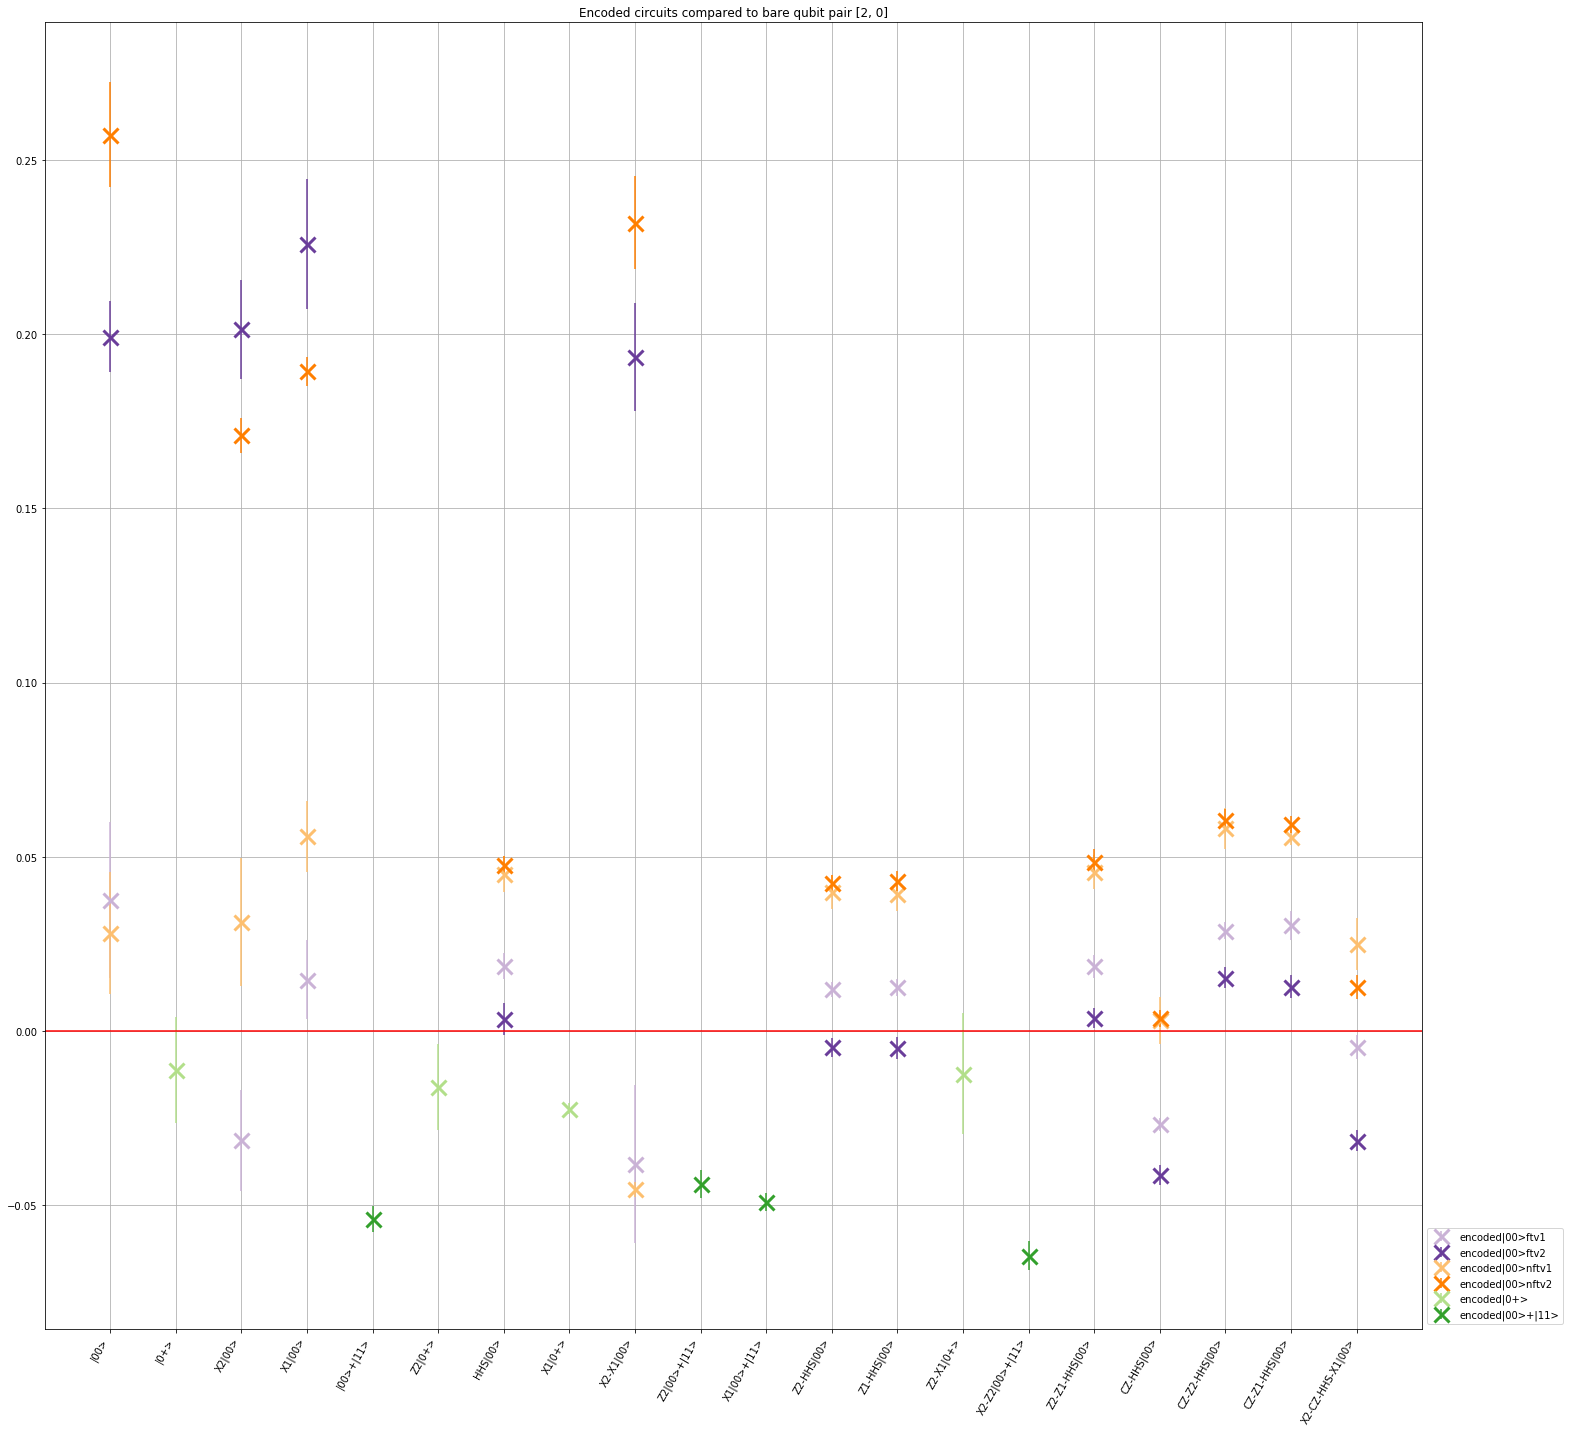

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 0.006099381473718689
encoded|00>ftv2 0.06445520913433117
encoded|00>nftv1 0.03181402352168249
encoded|00>nftv2 0.09732969267666916
encoded|0+> -0.015373624221201868
encoded|00>+|11> -0.05276537040107603


In [24]:
plottool.plot_everything_averaged_diff('data/Processed_data/', save_data_folder_pref='data/Plot_data/',
                                 logscaley=False,
                                 bareindex=1,
                                 ci=.99)

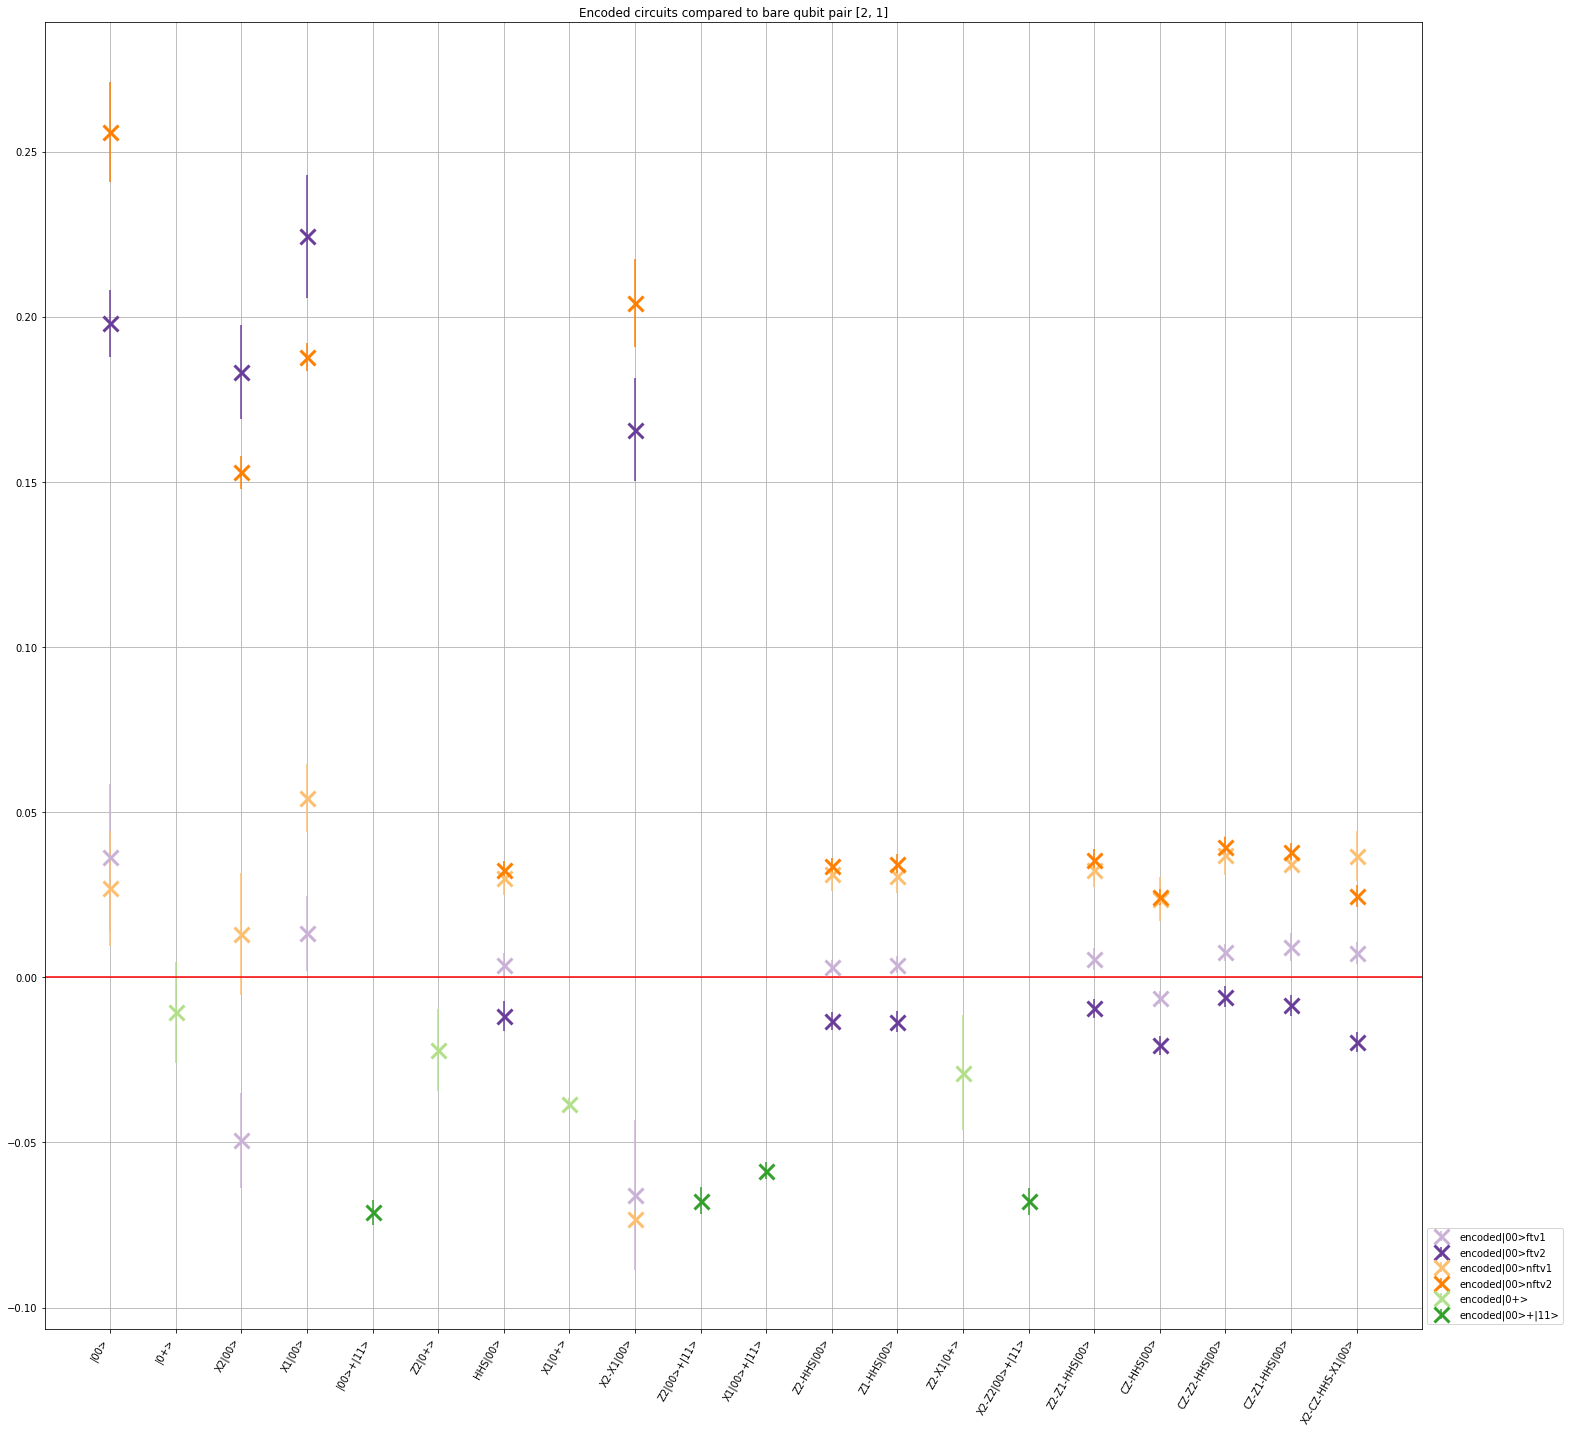

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 -0.0026198753979988394
encoded|00>ftv2 0.05573595226261365
encoded|00>nftv1 0.023094766649964963
encoded|00>nftv2 0.08861043580495163
encoded|0+> -0.02496159432829822
encoded|00>+|11> -0.06630571044219695


In [25]:
plottool.plot_everything_averaged_diff('data/Processed_data/', save_data_folder_pref='data/Plot_data/',
                                 logscaley=False,
                                 bareindex=2,
                                 ci=.99)

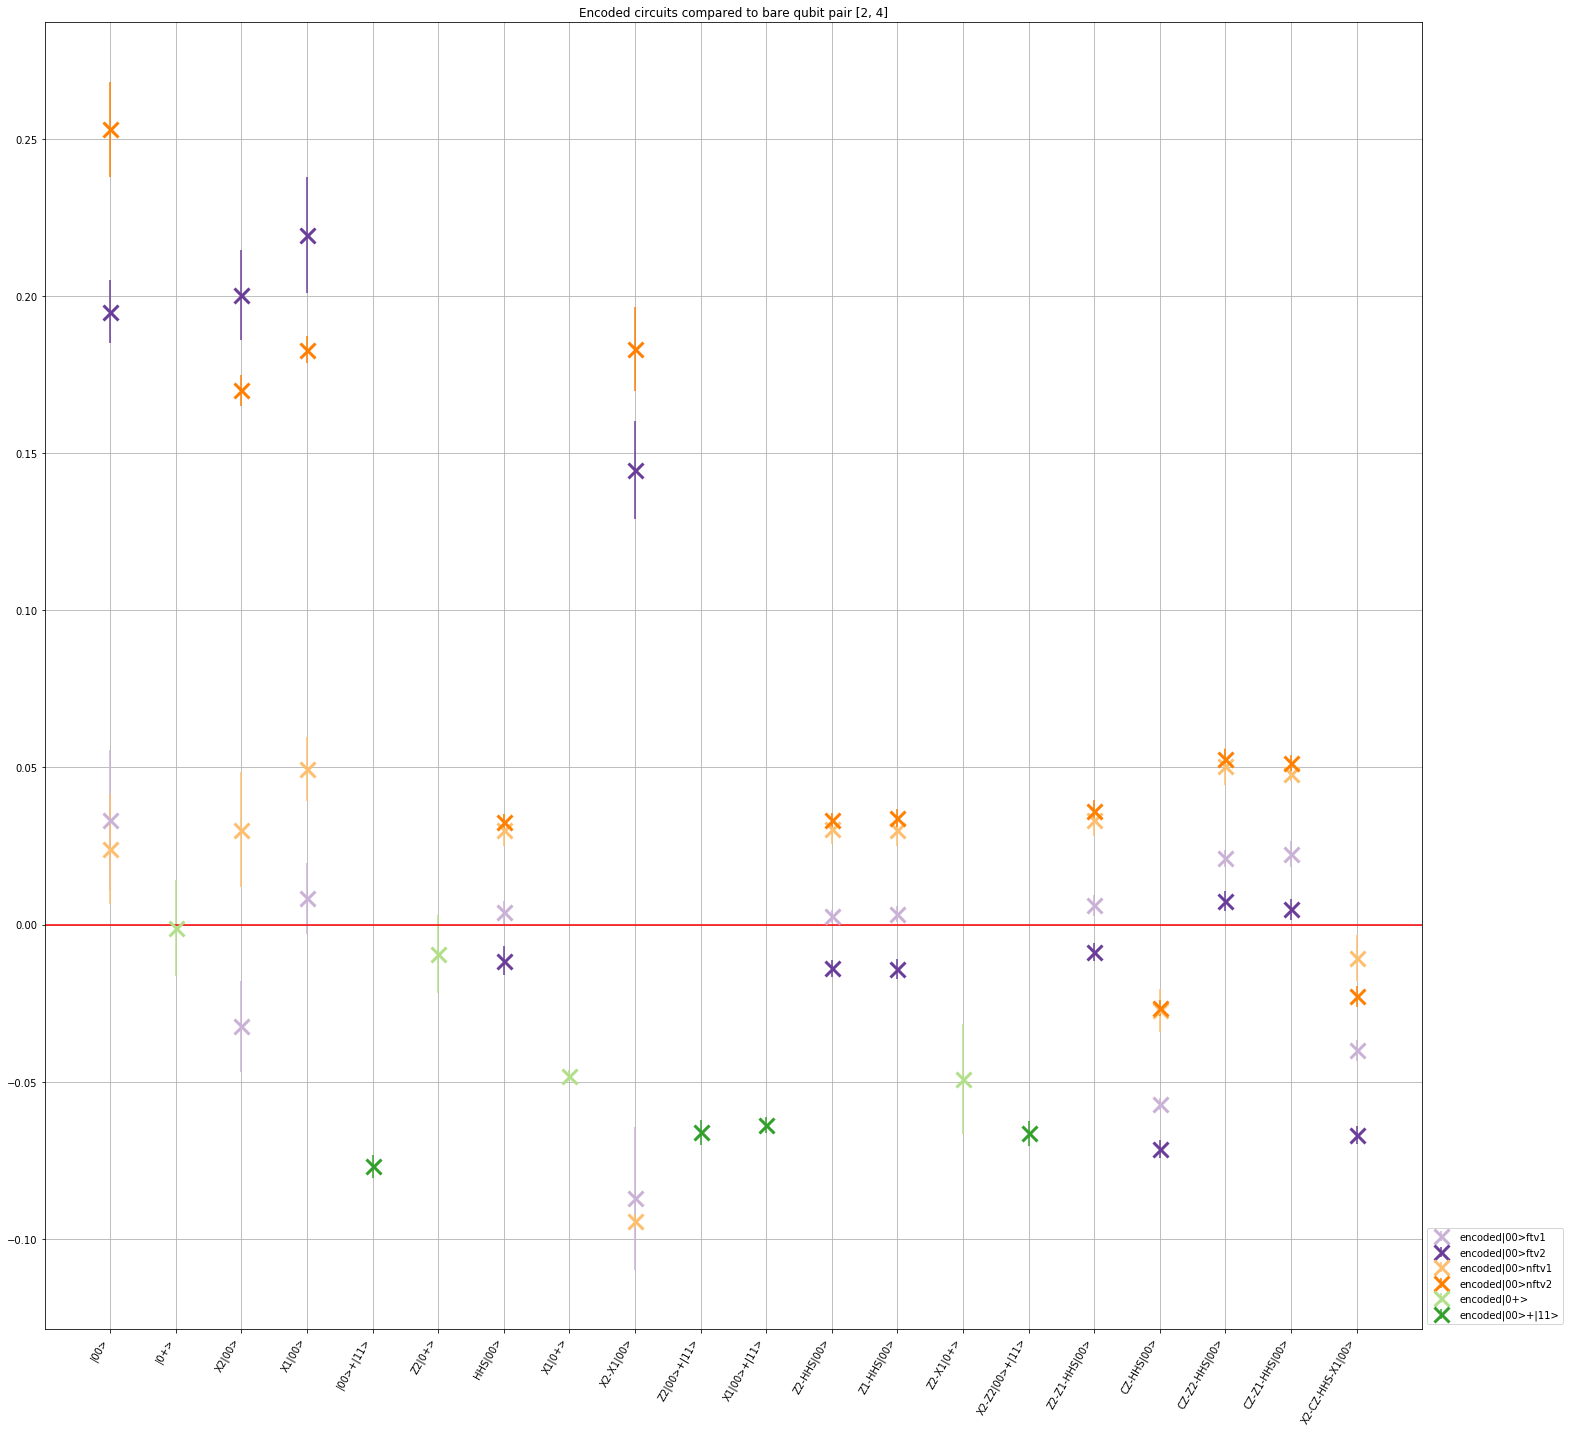

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 -0.009584235351763861
encoded|00>ftv2 0.04877159230884862
encoded|00>nftv1 0.01613040669619994
encoded|00>nftv2 0.08164607585118662
encoded|0+> -0.02688877160483301
encoded|00>+|11> -0.0682587638926627


In [26]:
plottool.plot_everything_averaged_diff('data/Processed_data/', save_data_folder_pref='data/Plot_data/',
                                 logscaley=False,
                                 bareindex=3,
                                 ci=.99)

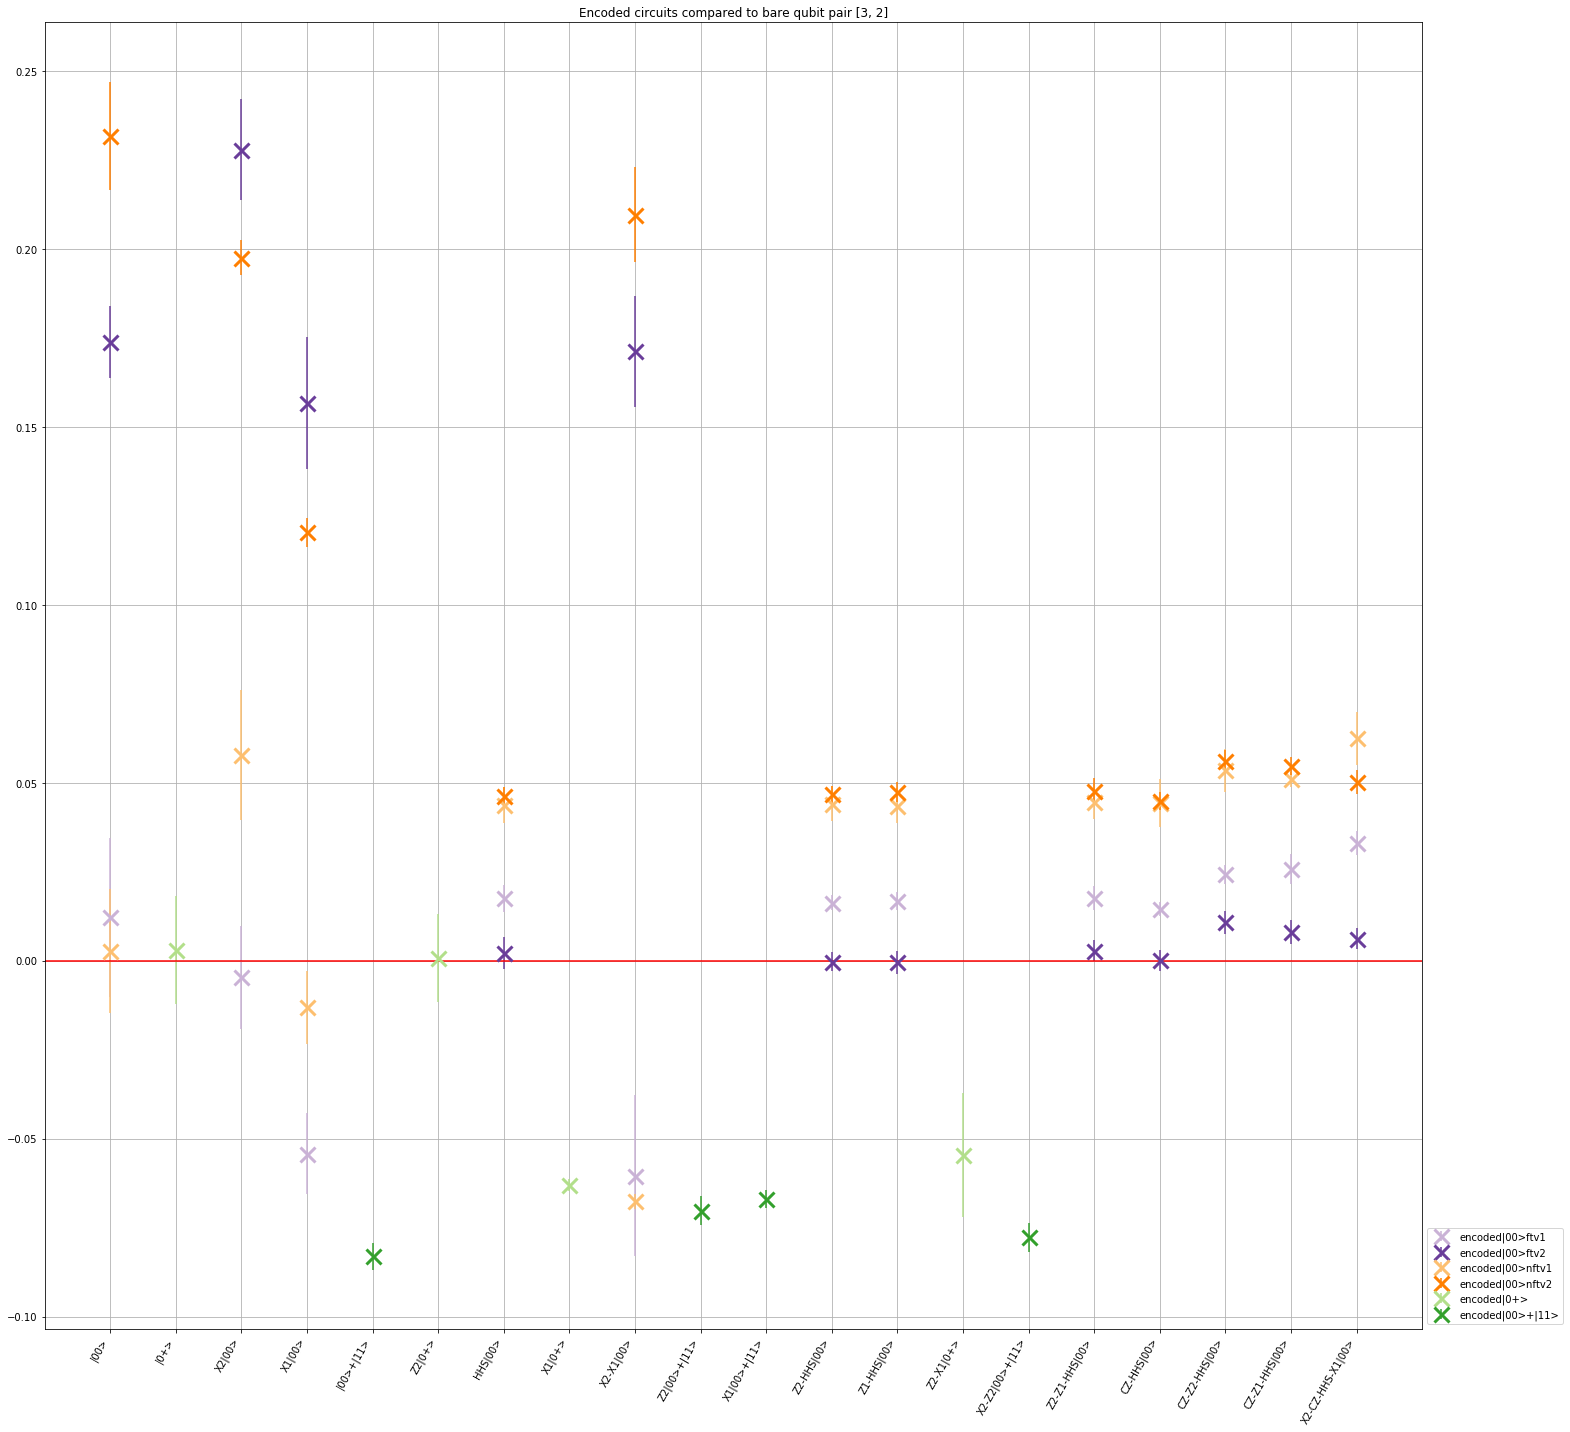

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 0.004893846456058145
encoded|00>ftv2 0.06324967411667064
encoded|00>nftv1 0.030608488504021945
encoded|00>nftv2 0.09612415765900861
encoded|0+> -0.028490169580872186
encoded|00>+|11> -0.07451304587650193


In [27]:
plottool.plot_everything_averaged_diff('data/Processed_data/', save_data_folder_pref='data/Plot_data/',
                                 logscaley=False,
                                 bareindex=4,
                                 ci=.99)

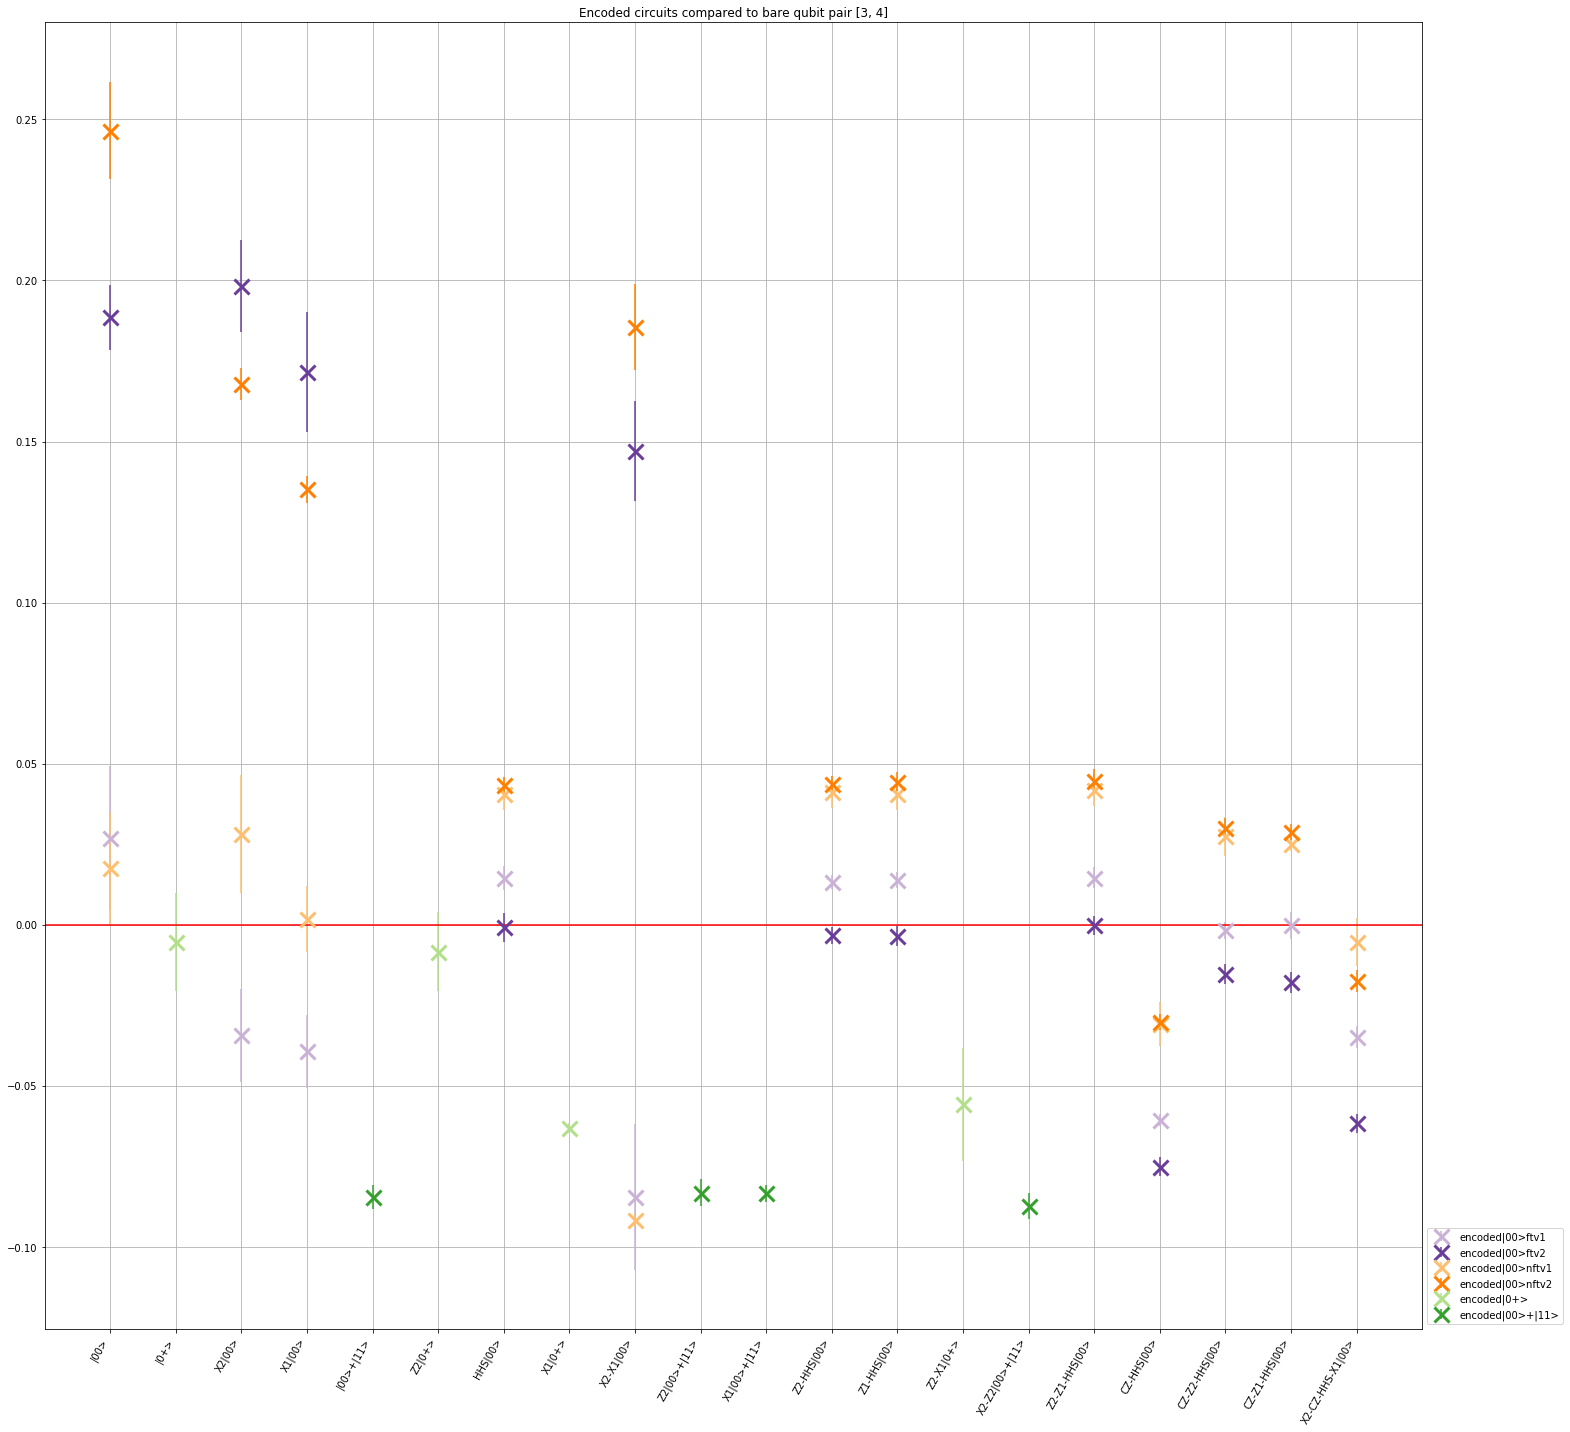

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 -0.014380936046398736
encoded|00>ftv2 0.04397489161421375
encoded|00>nftv1 0.011333706001565065
encoded|00>nftv2 0.07684937515655174
encoded|0+> -0.03317863858128181
encoded|00>+|11> -0.08463808249113808


In [28]:
plottool.plot_everything_averaged_diff('data/Processed_data/', save_data_folder_pref='data/Plot_data/',
                                 logscaley=False,
                                 bareindex=5,
                                 ci=.99)

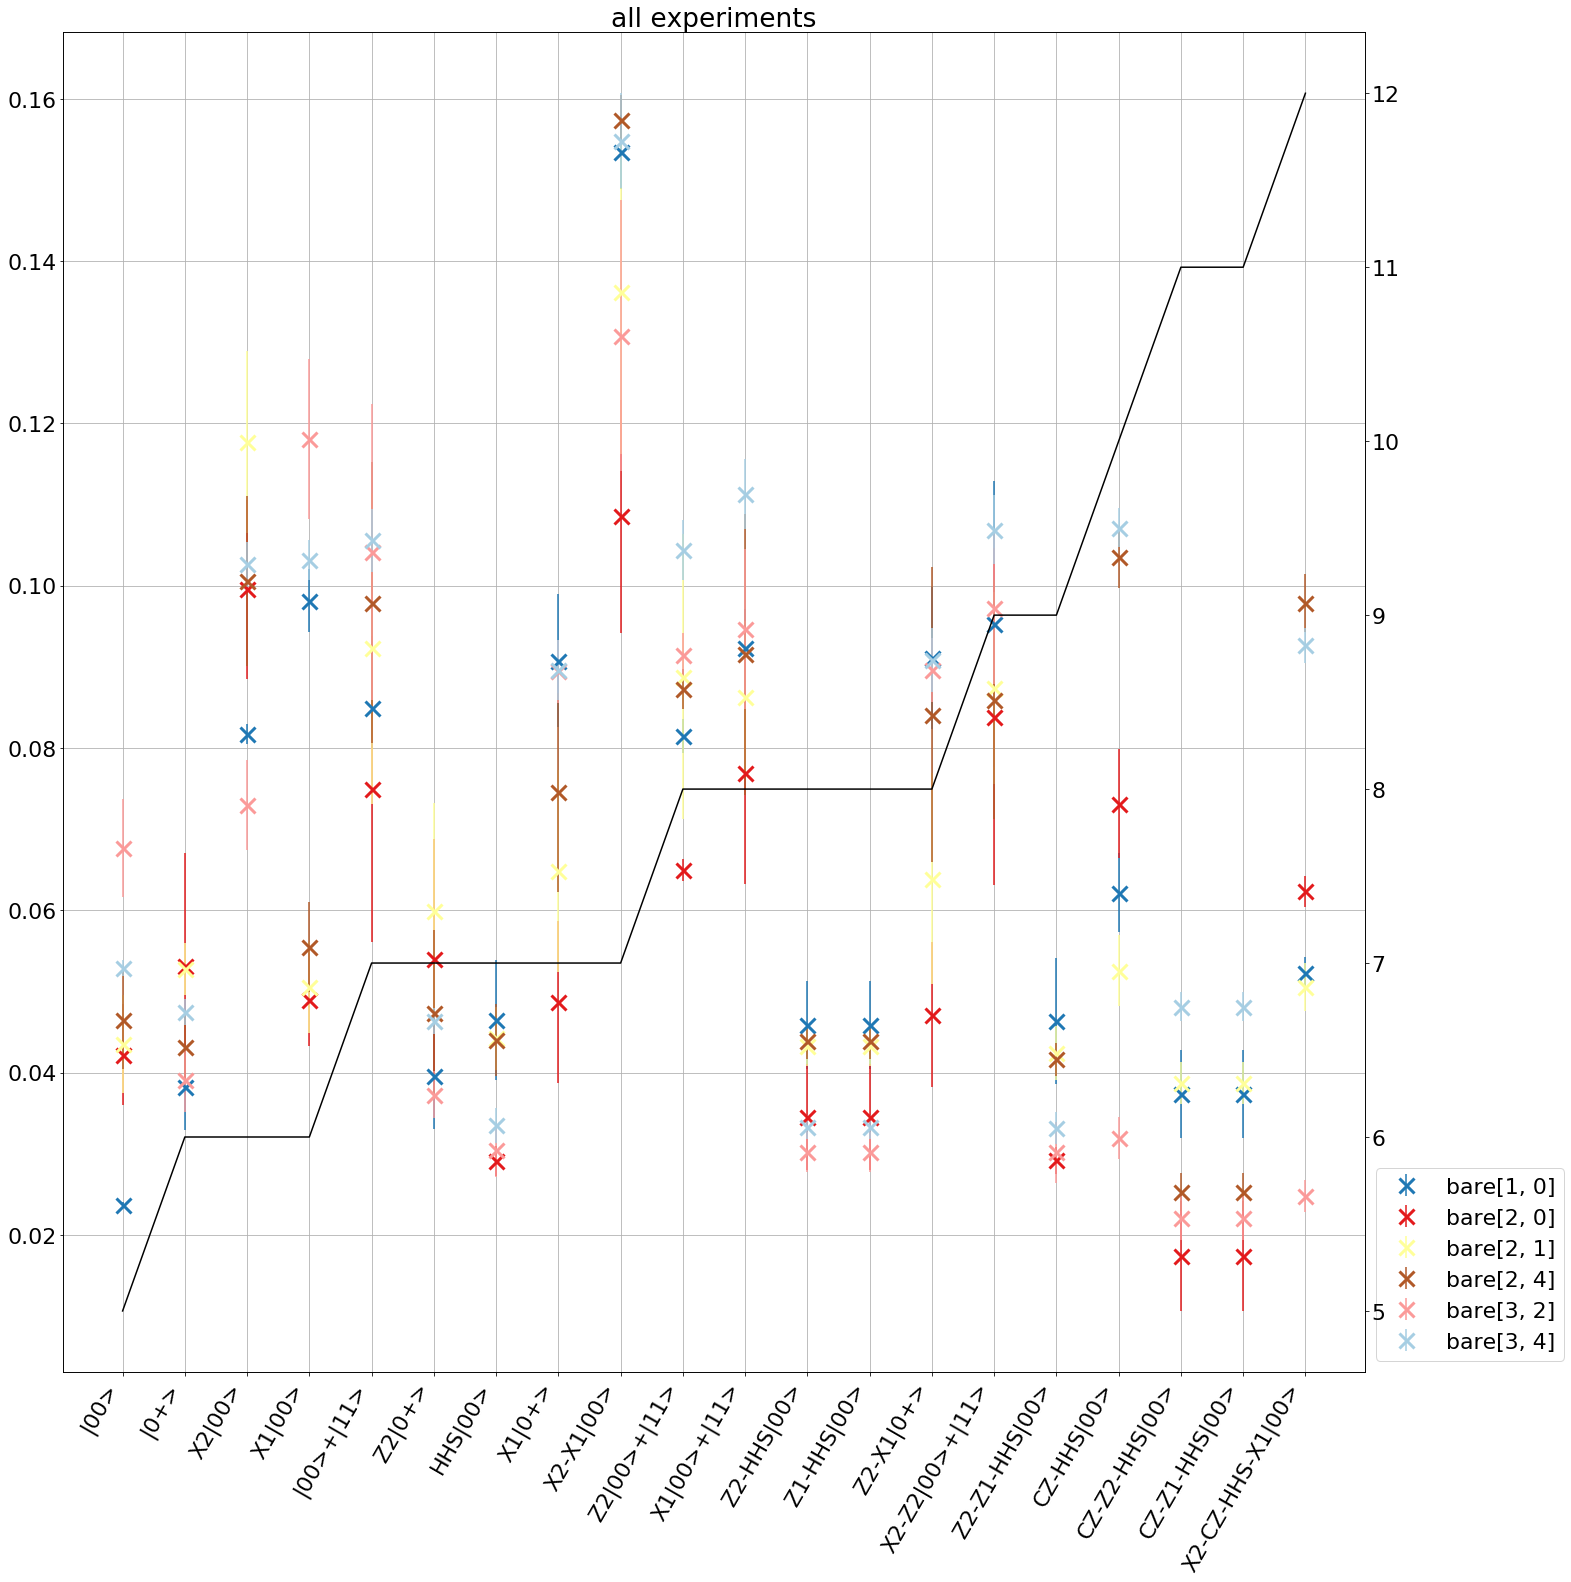

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 0.05585260583230345
encoded|00>ftv2 0.11420843349291593
encoded|00>nftv1 0.08156724788026726
encoded|00>nftv2 0.14708291703525392
encoded|0+> 0.035389089858050844
encoded|00>+|11> 0.0223935081476726


In [170]:
plottool.plot_everything_averaged('data/Processed_data/', save_data_folder_pref='data/Plot_data/',
                                 logscaley=False,
                                 sublabels=plottool.PLOT_LABELS[:6],
                                 ci=.99)

In [150]:
import os

In [117]:
importlib.reload(exptool)
importlib.reload(plottool)

<module 'tools.Ploting_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Ploting_tools.py'>

In [152]:
file_list = os.listdir('data/Processed_data/')
n=0
for filename in file_list:
    n += exptool.repair_processed_data('data/Processed_data/'+filename, new_ext='')
print(n)

0


In [115]:
importlib.reload(exptool)
importlib.reload(plottool)

<module 'tools.Ploting_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Ploting_tools.py'>

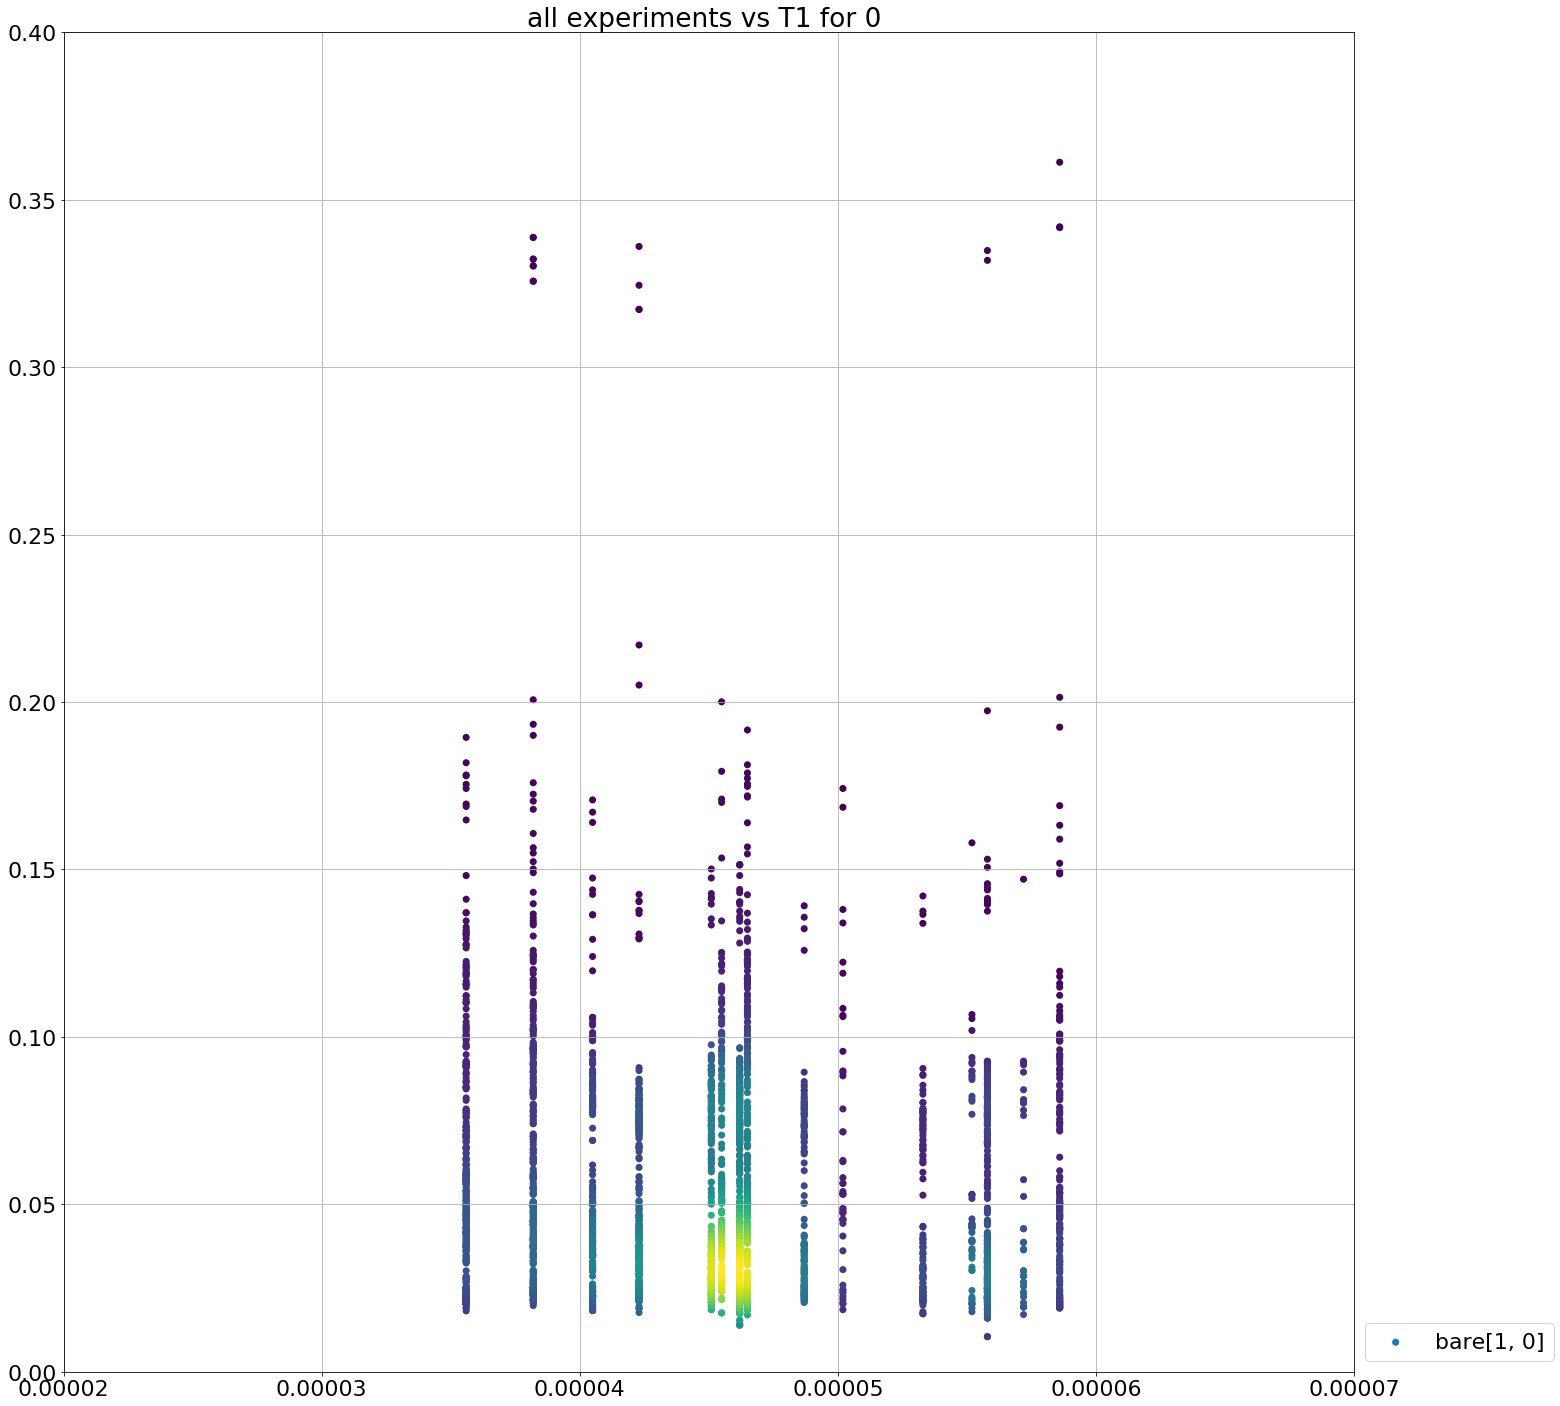

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [117]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'T1',  
                                    logscalex=False, 
                                    logscaley=False, 
                                    y_range=[0,0.4], 
                                    x_range=[0.00002,0.00007], 
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

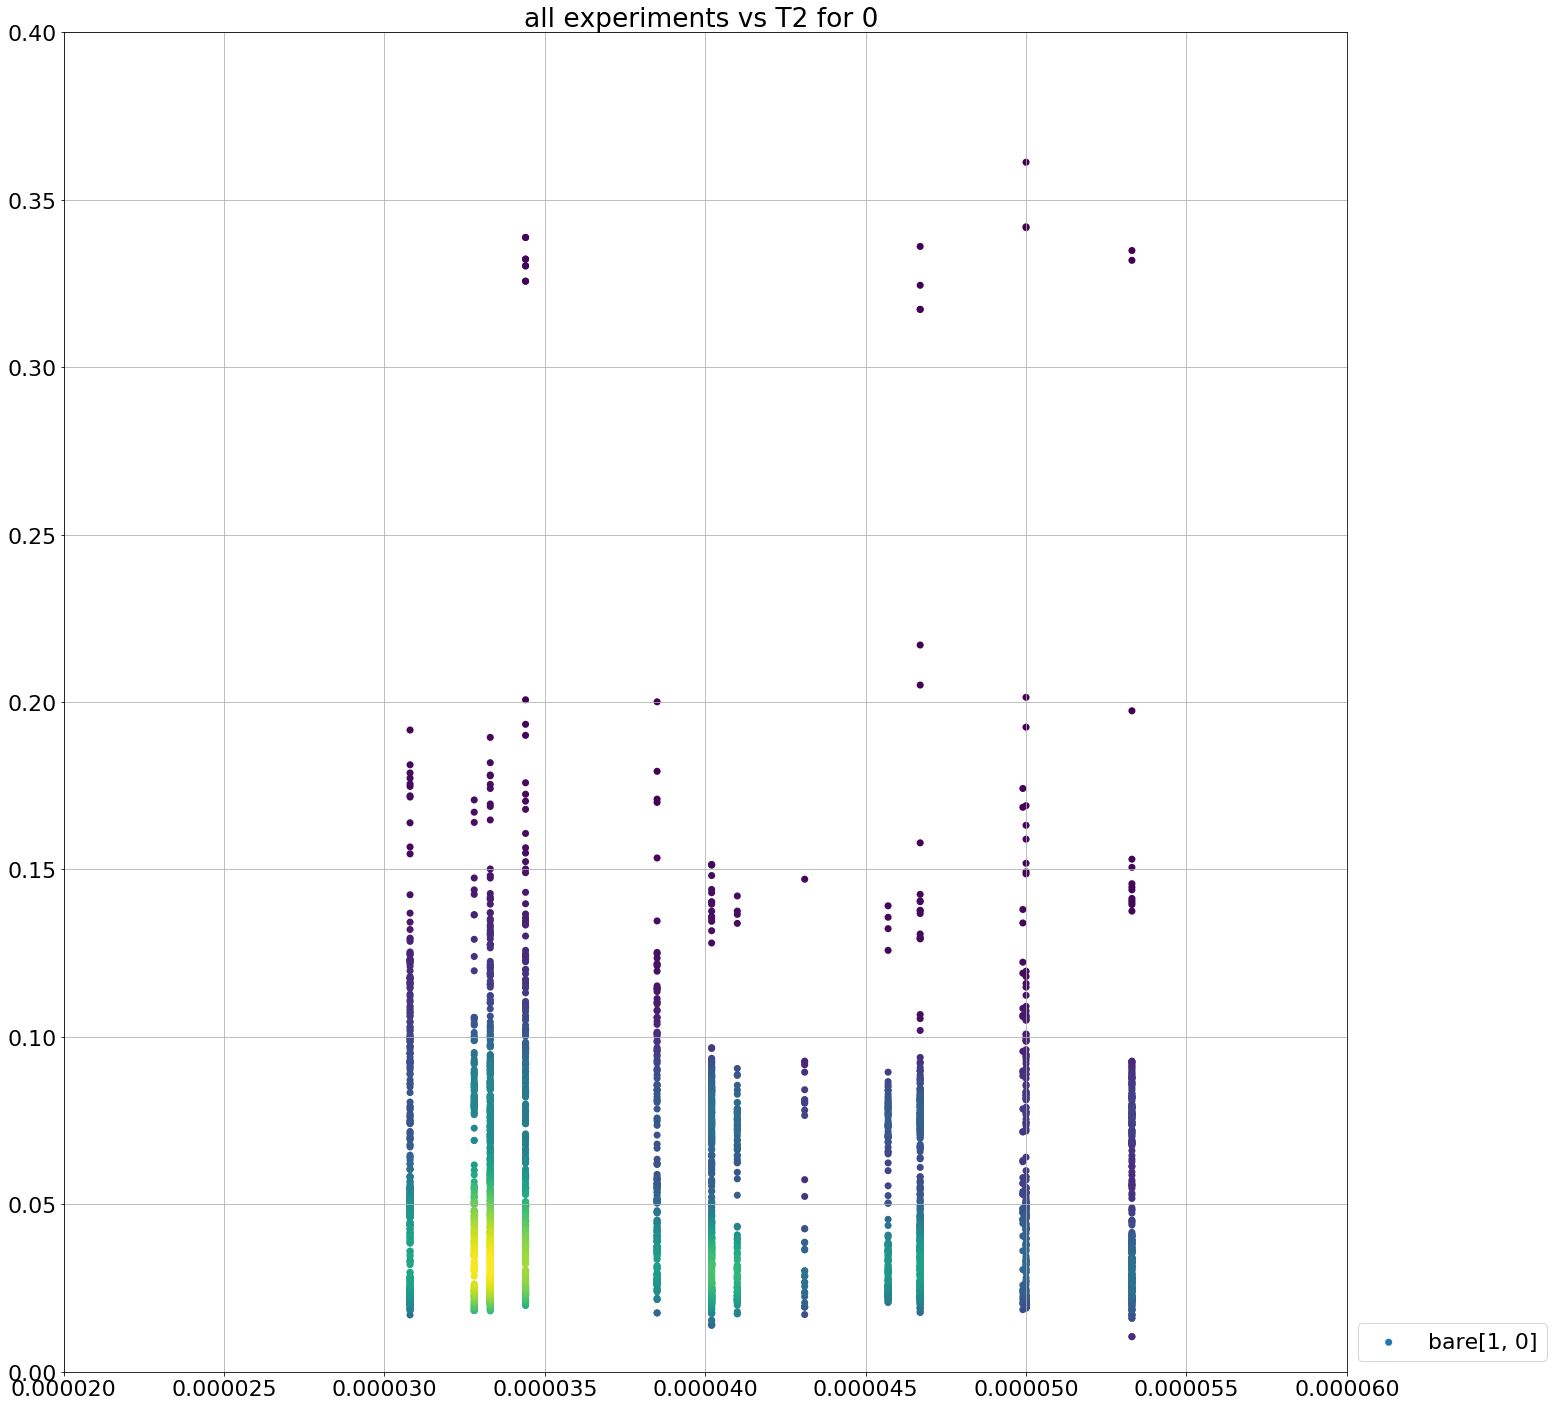

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [91]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'T2', 
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.00002,0.00006],
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

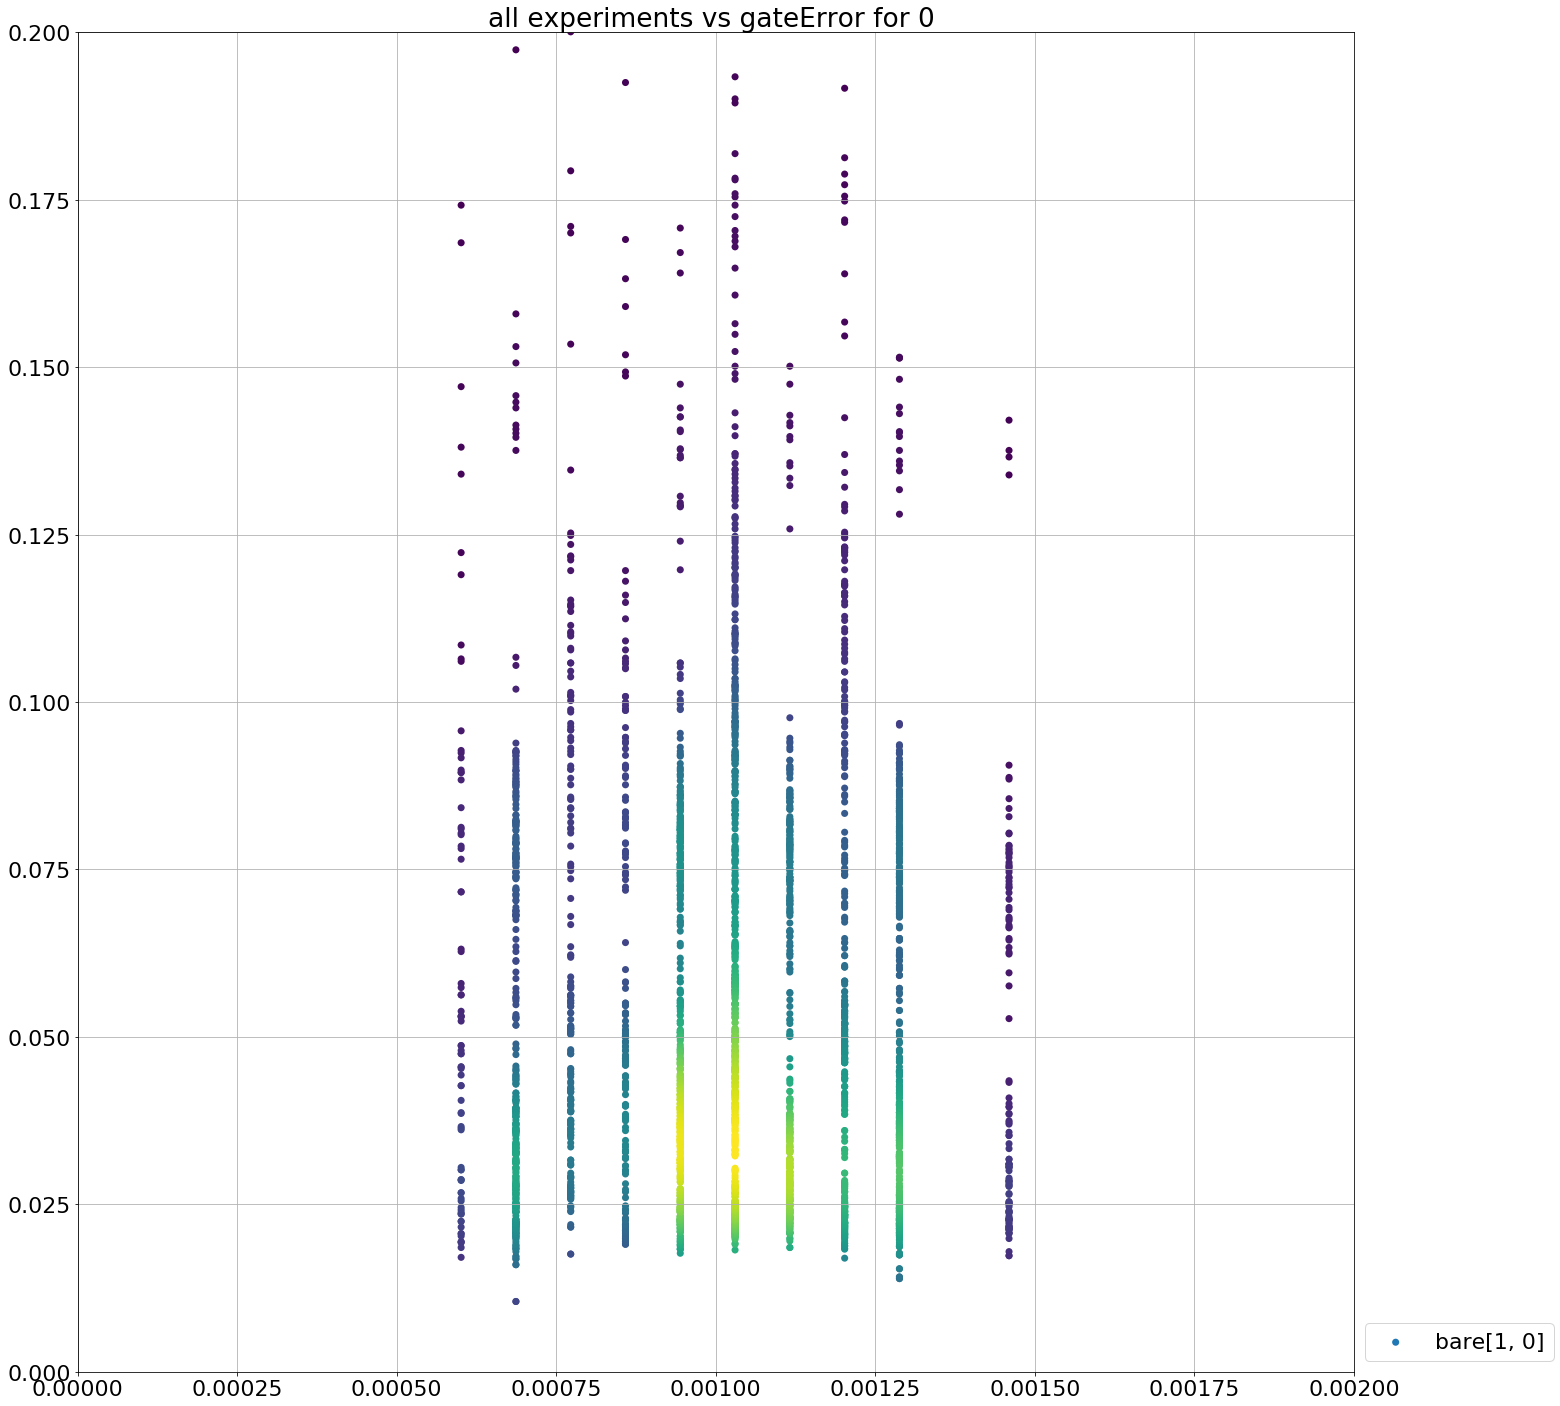

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [98]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'gateError', 
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0,0.002],
                                    y_range=[0,0.2],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

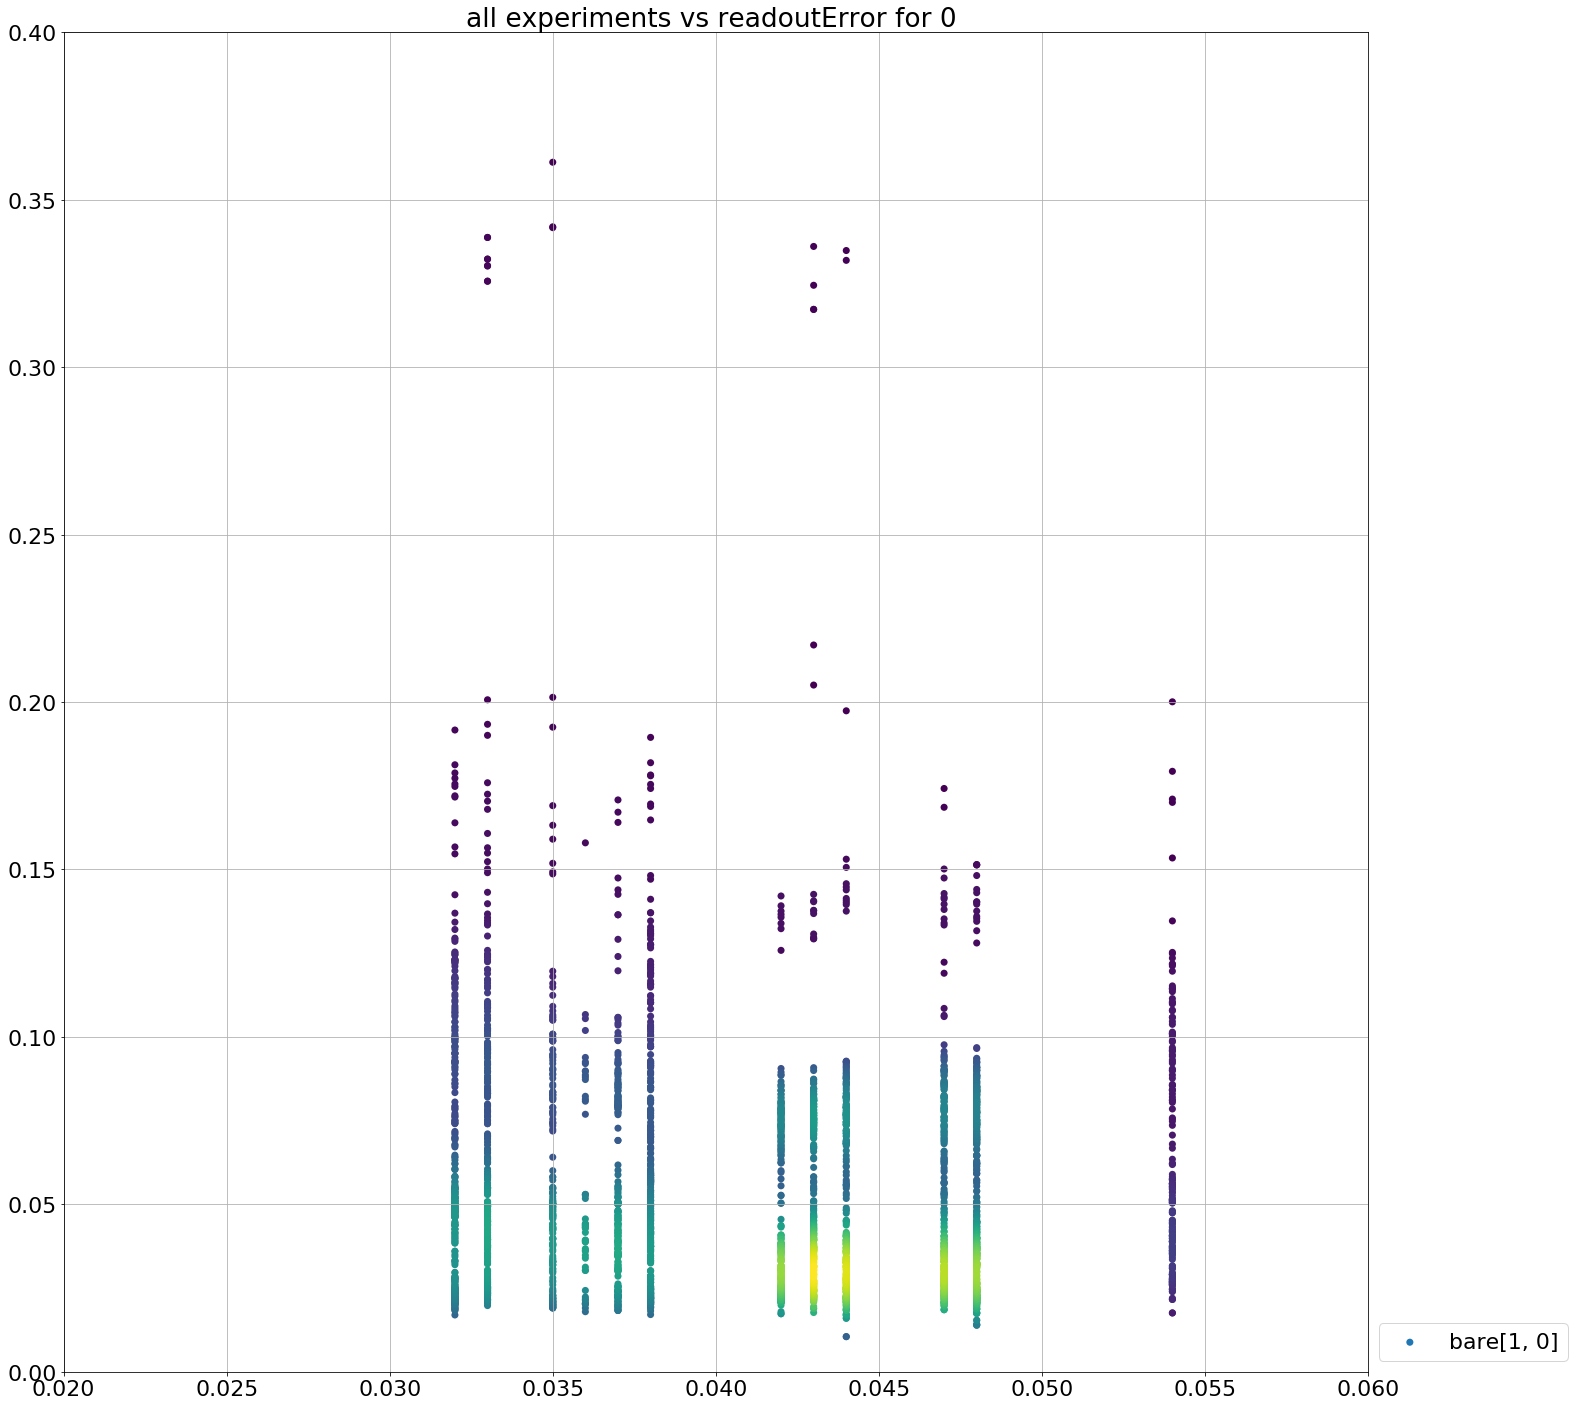

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [94]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'readoutError',  
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.02,0.06], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

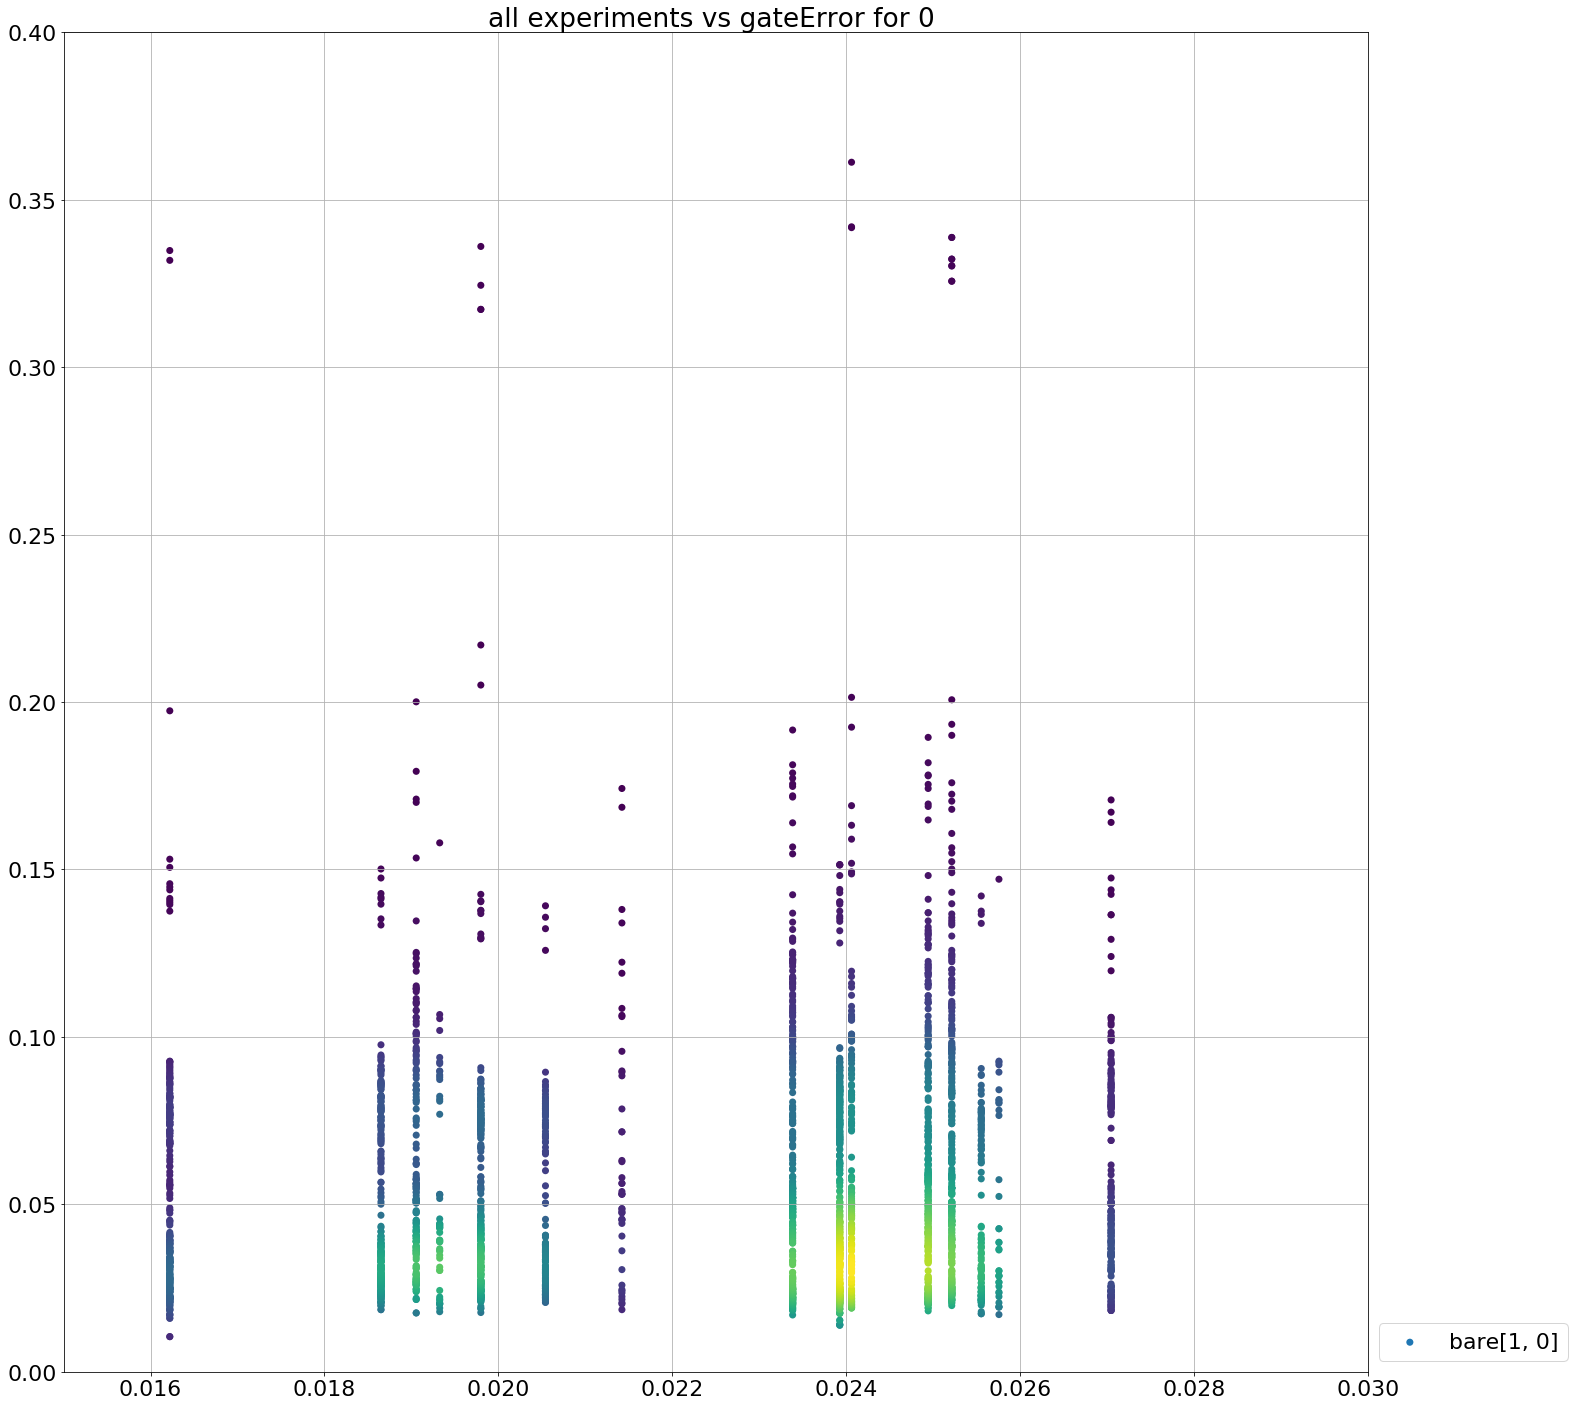

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [21]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.015,0.03], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

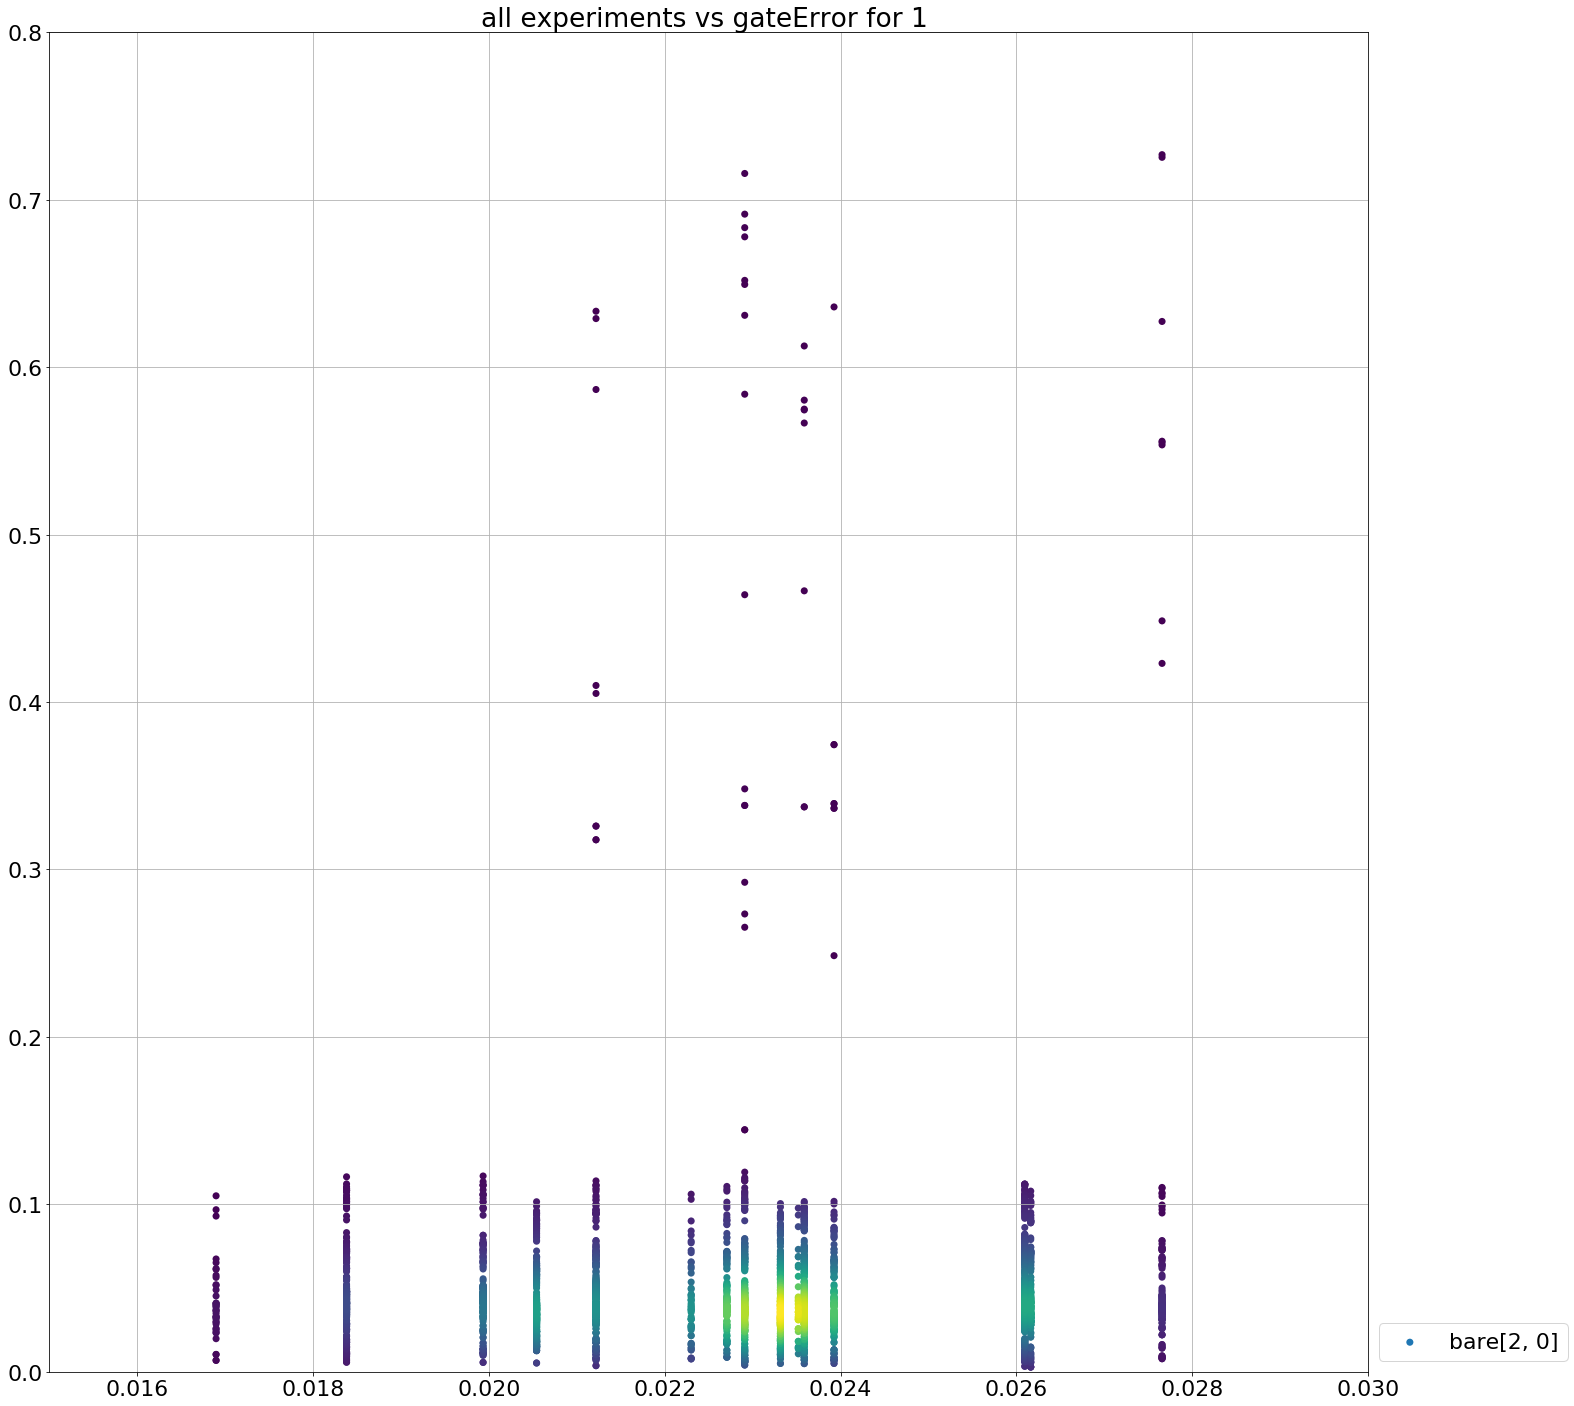

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [19]:
plottool.plot_everything_calib_data('data/Processed_data/', 1, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.015,0.03], 
                                    y_range=[0,0.8],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [1]])

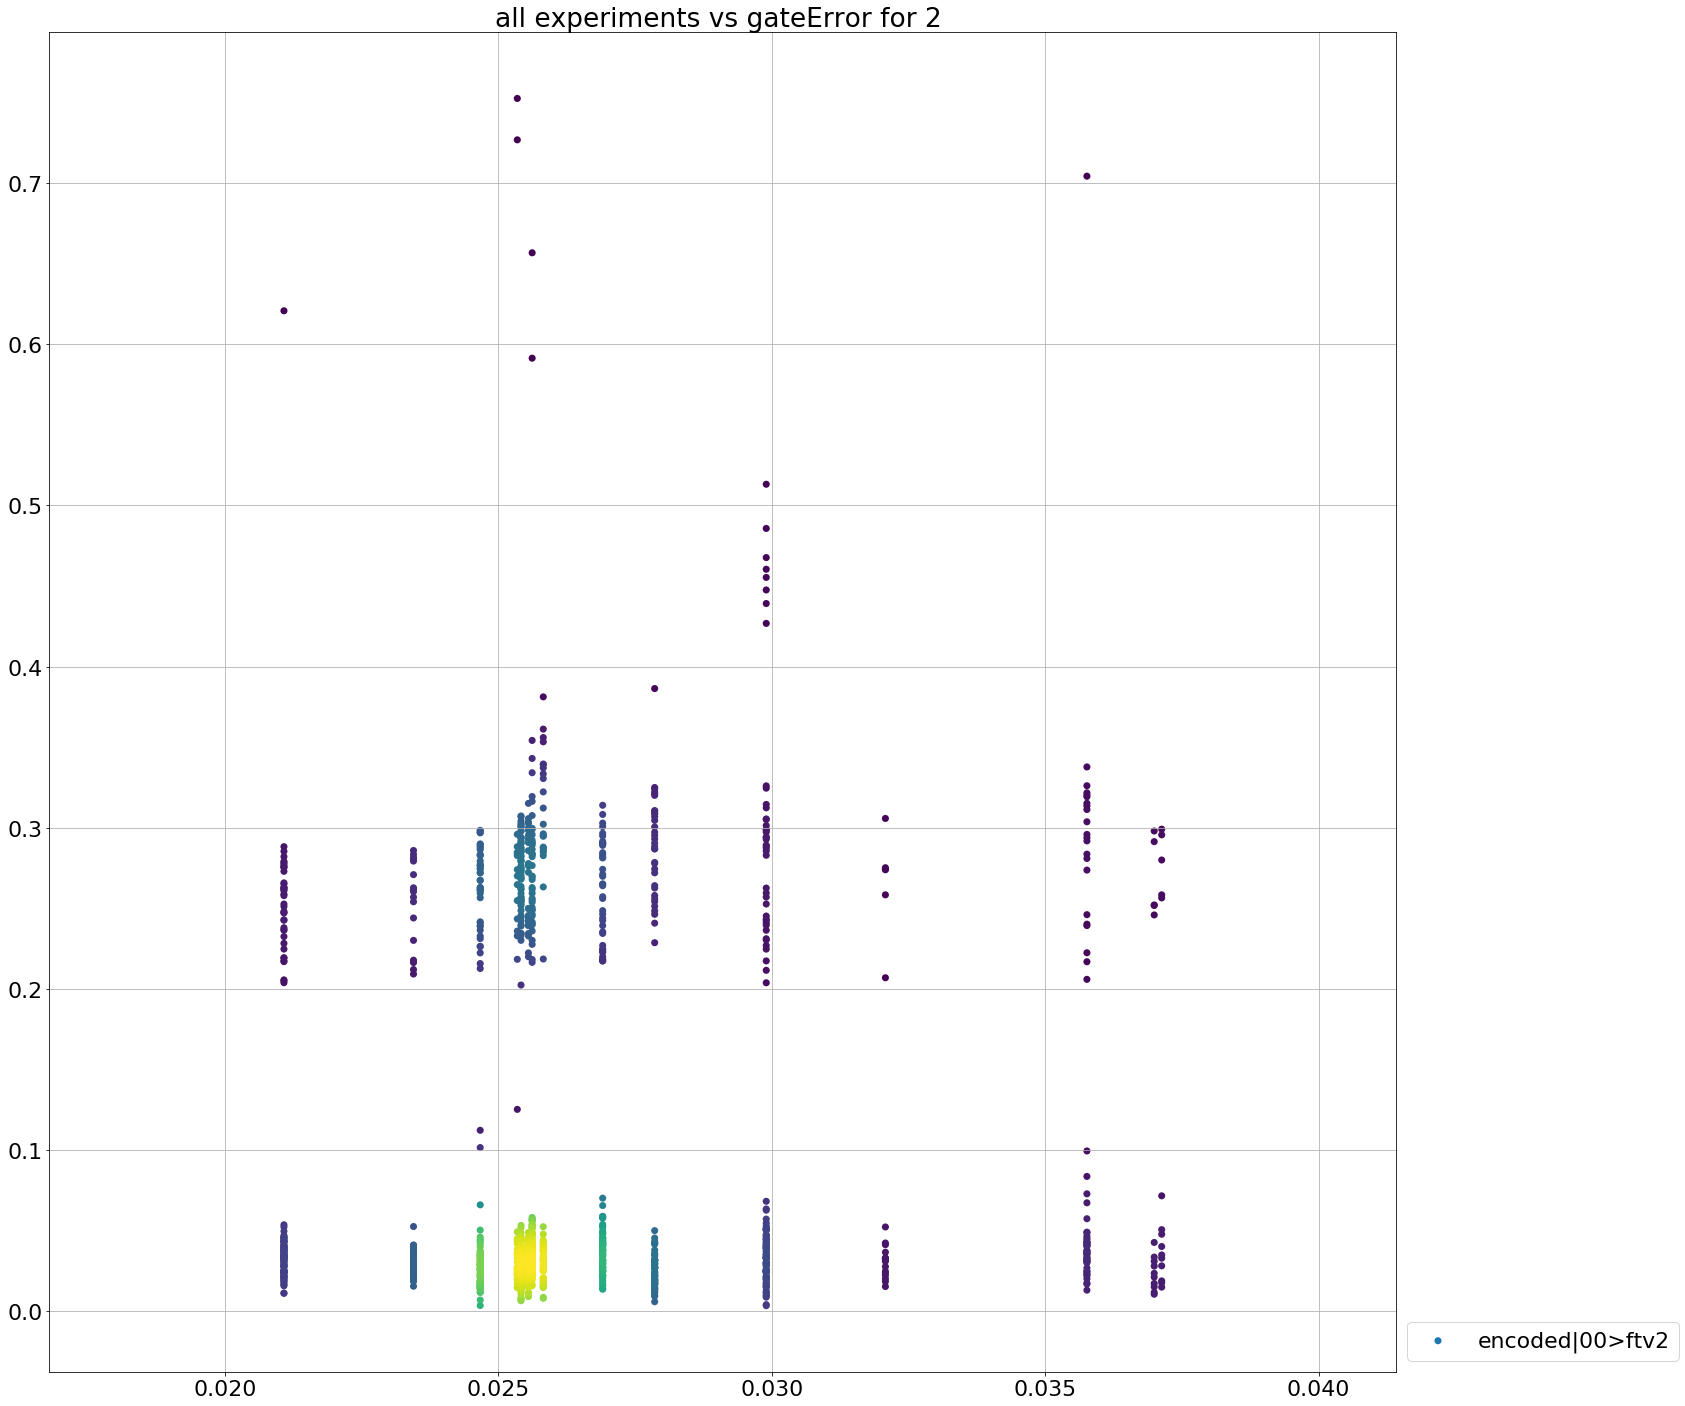

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [109]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.035], 
                                    y_range=[0,0.15],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])

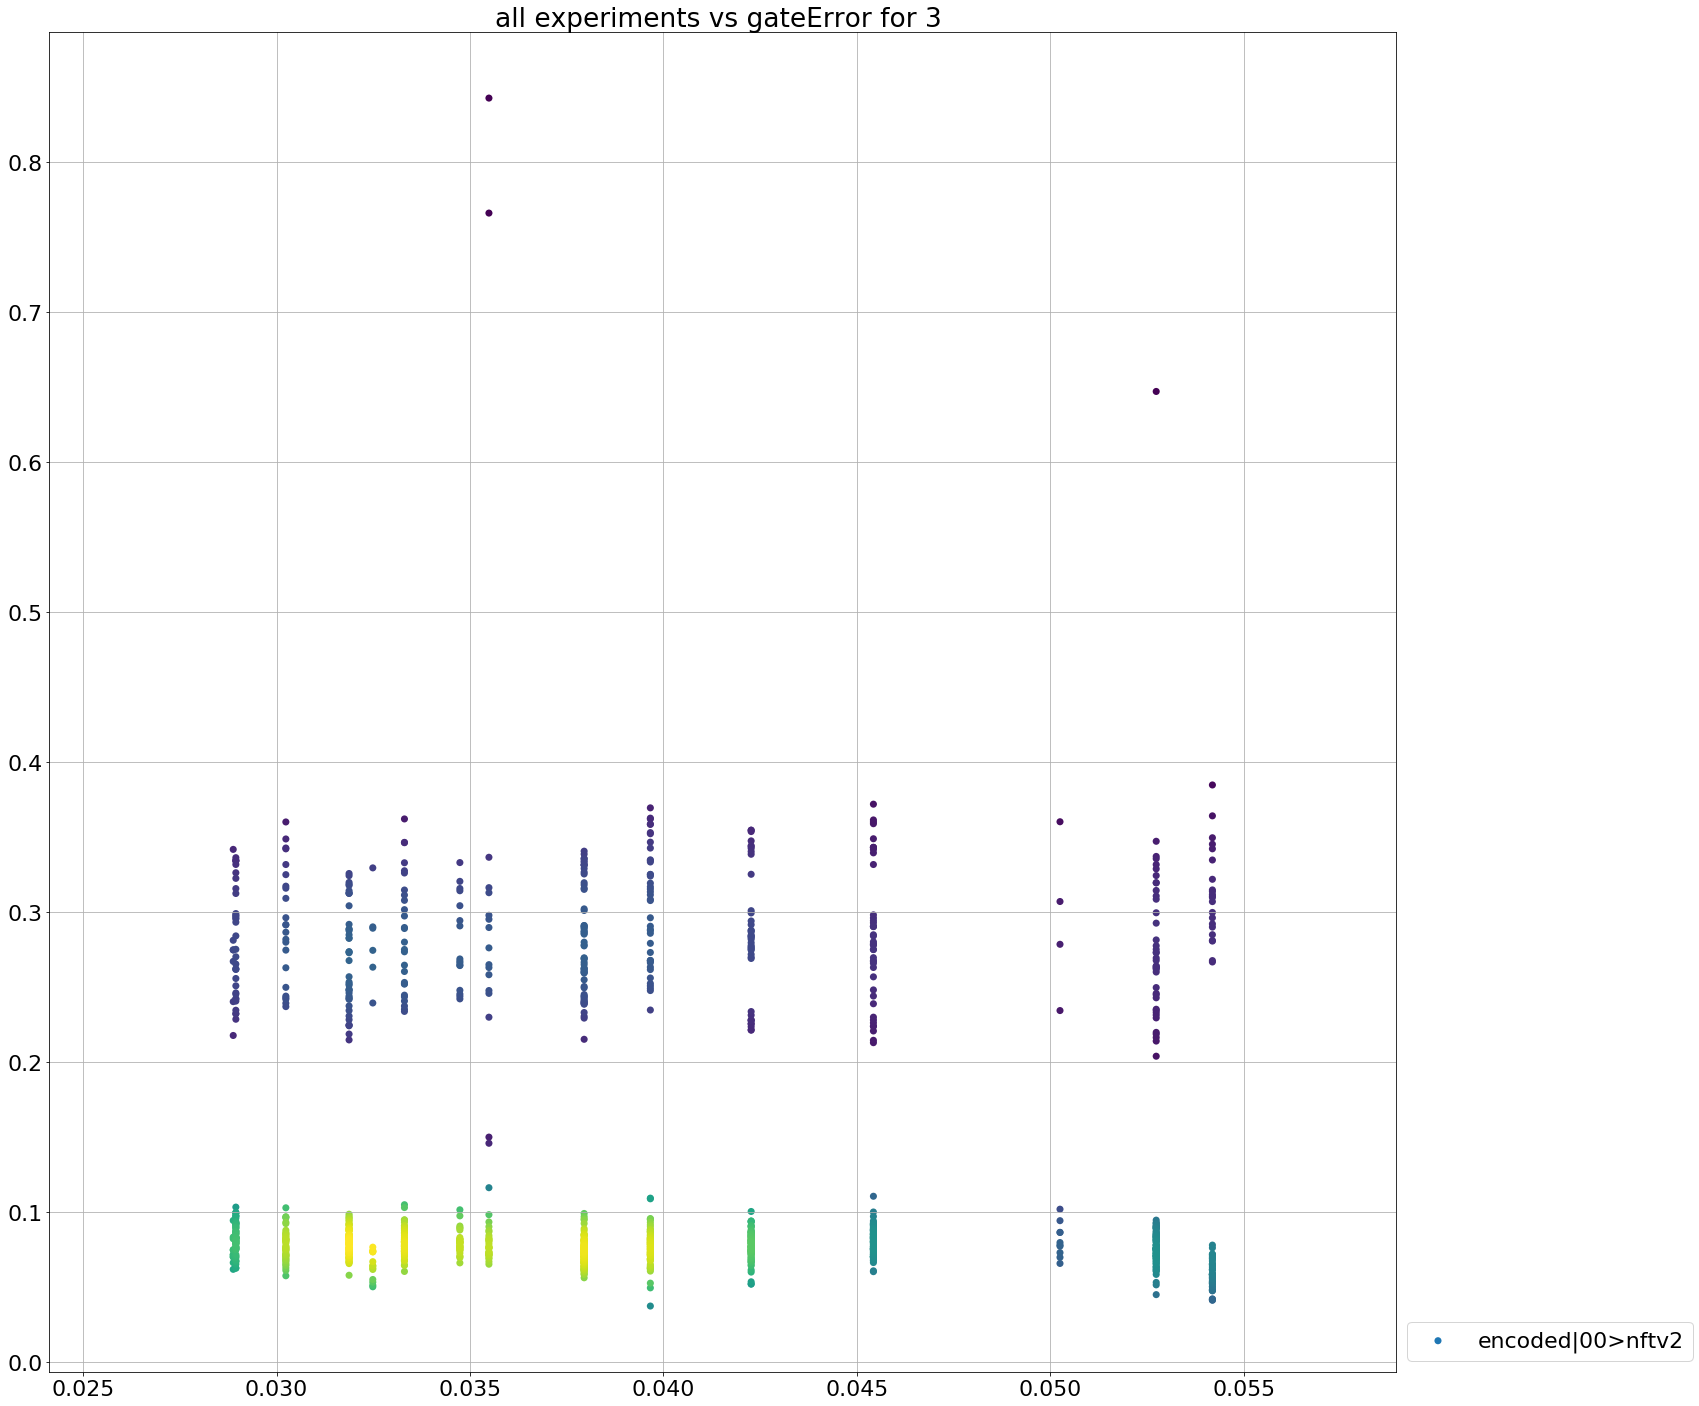

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [108]:
plottool.plot_everything_calib_data('data/Processed_data/', 3, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.055], 
                                    y_range=[0,0.15],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [9]])

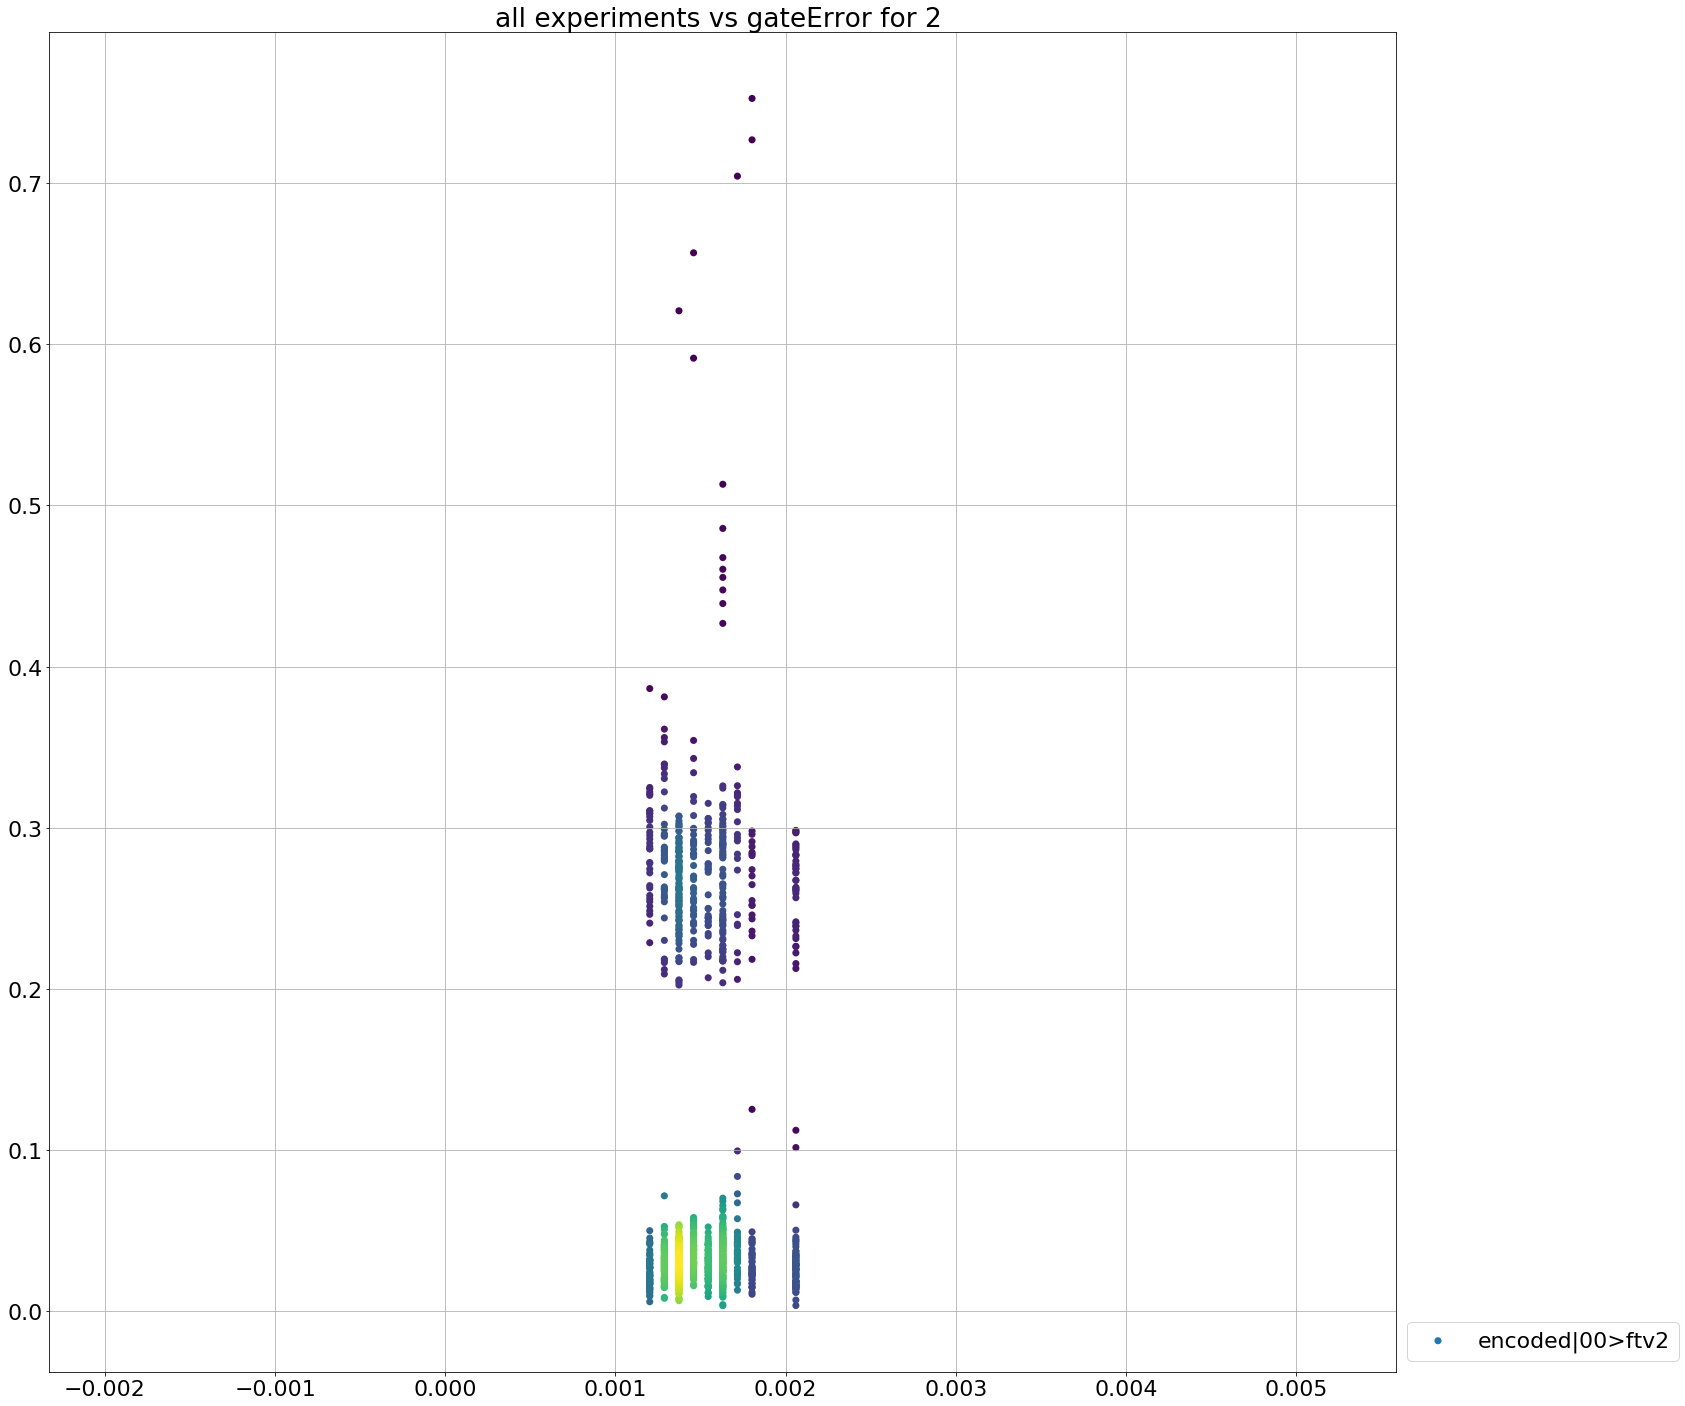

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [113]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'gateError', 
                                    multi_qubit_param=False,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.035], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])

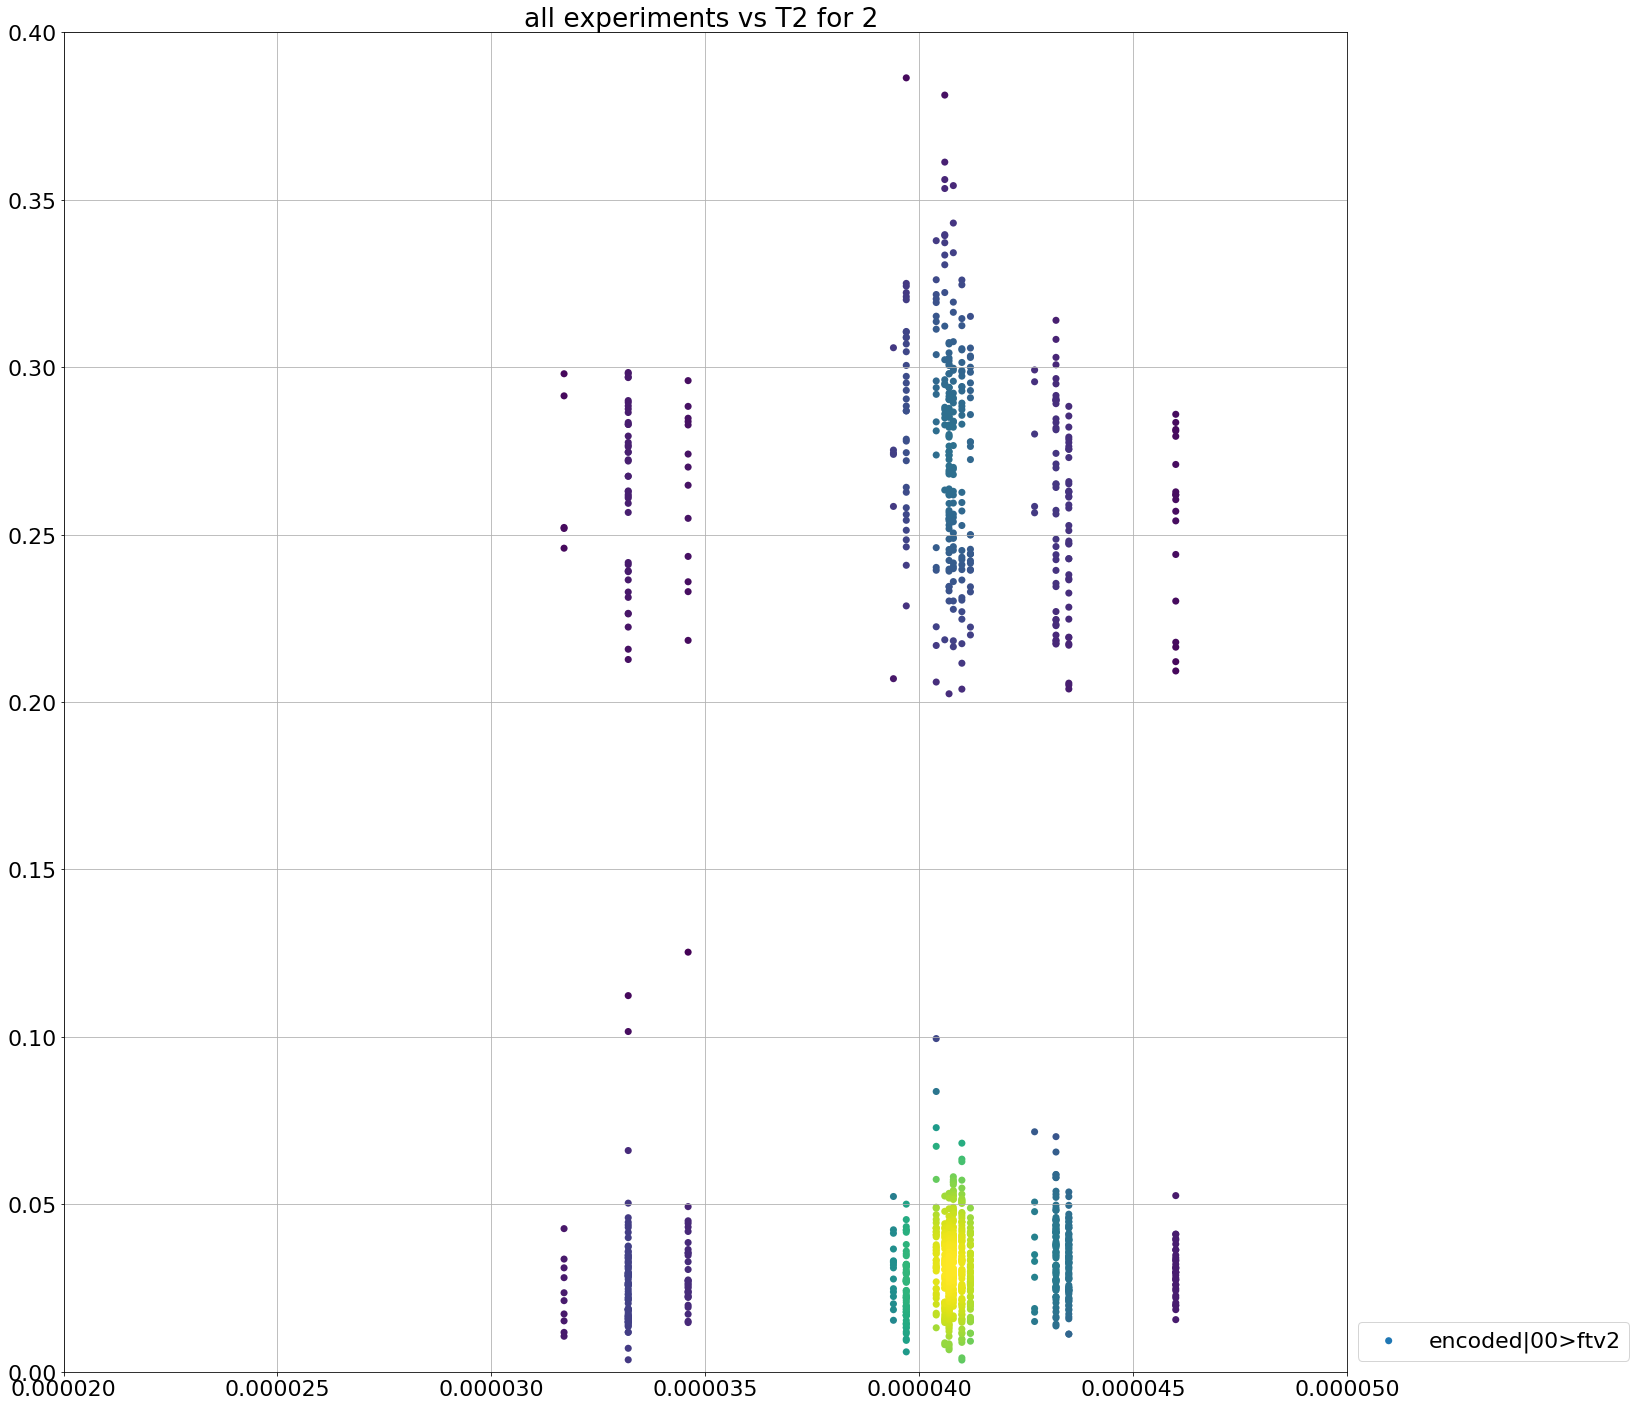

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [119]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'T2', 
                                    multi_qubit_param=False,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.00002,0.00005], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])

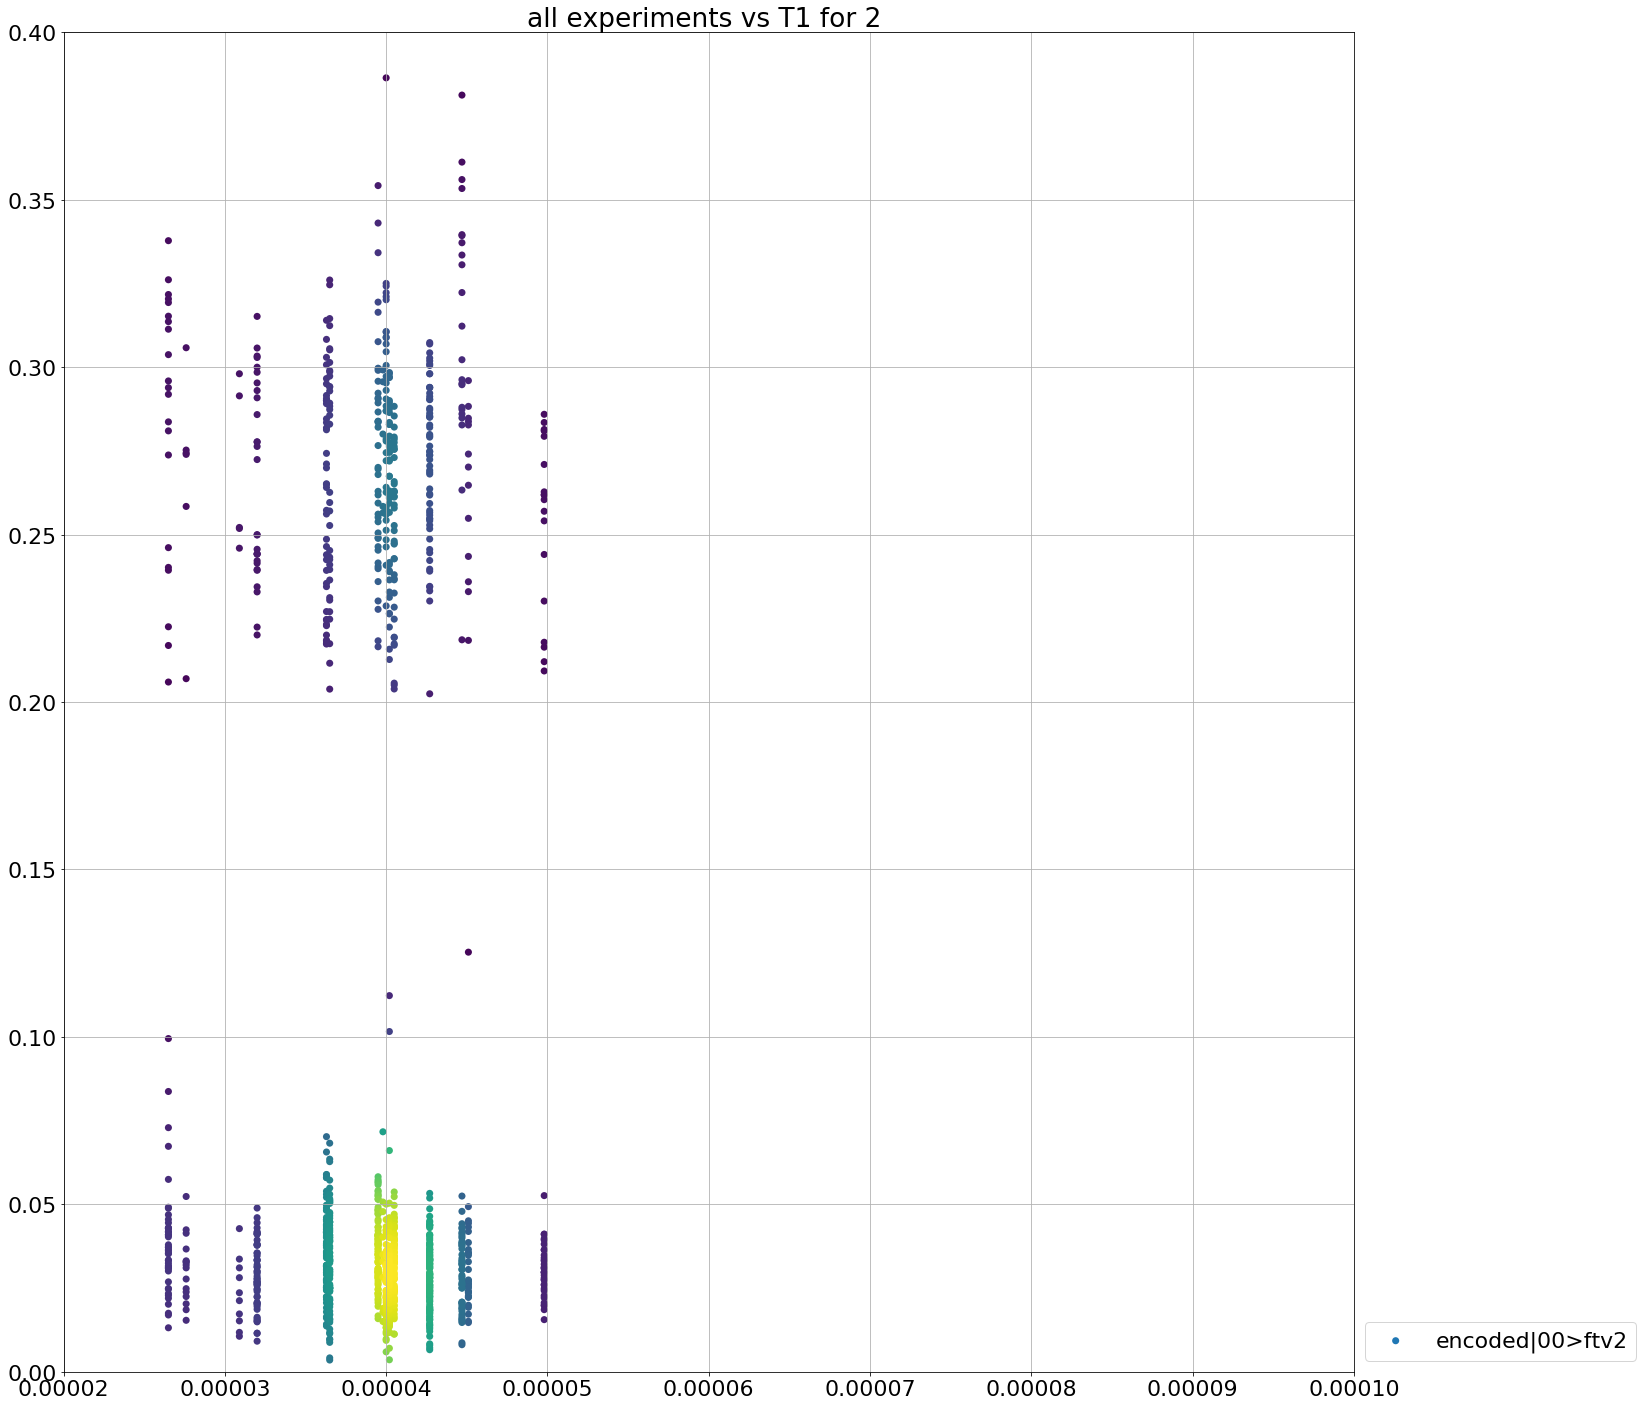

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [121]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'T1', 
                                    multi_qubit_param=False,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.00002,0.0001], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])

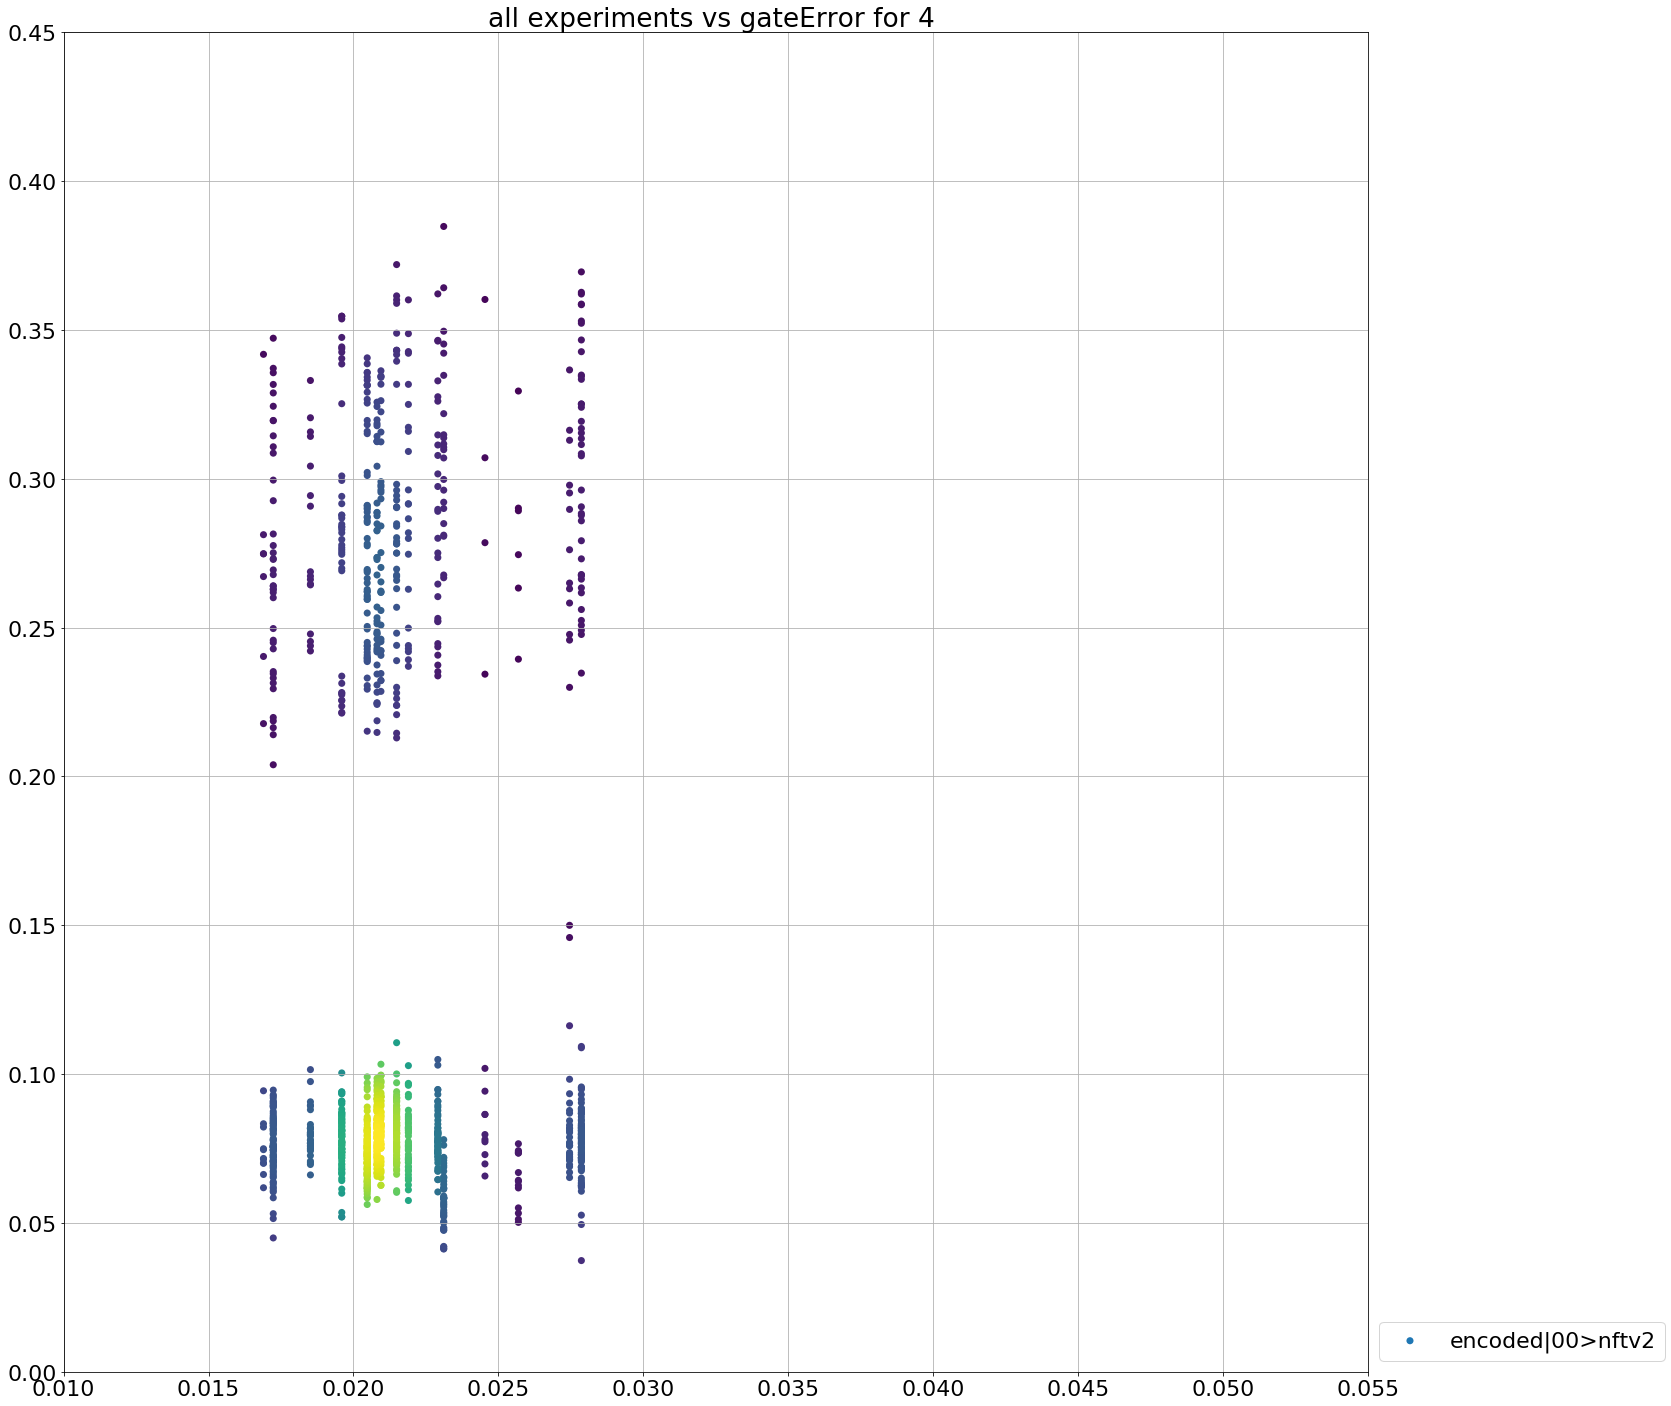

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [26]:
plottool.plot_everything_calib_data('data/Processed_data/', 4, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.055], 
                                    y_range=[0,0.45],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [9]])

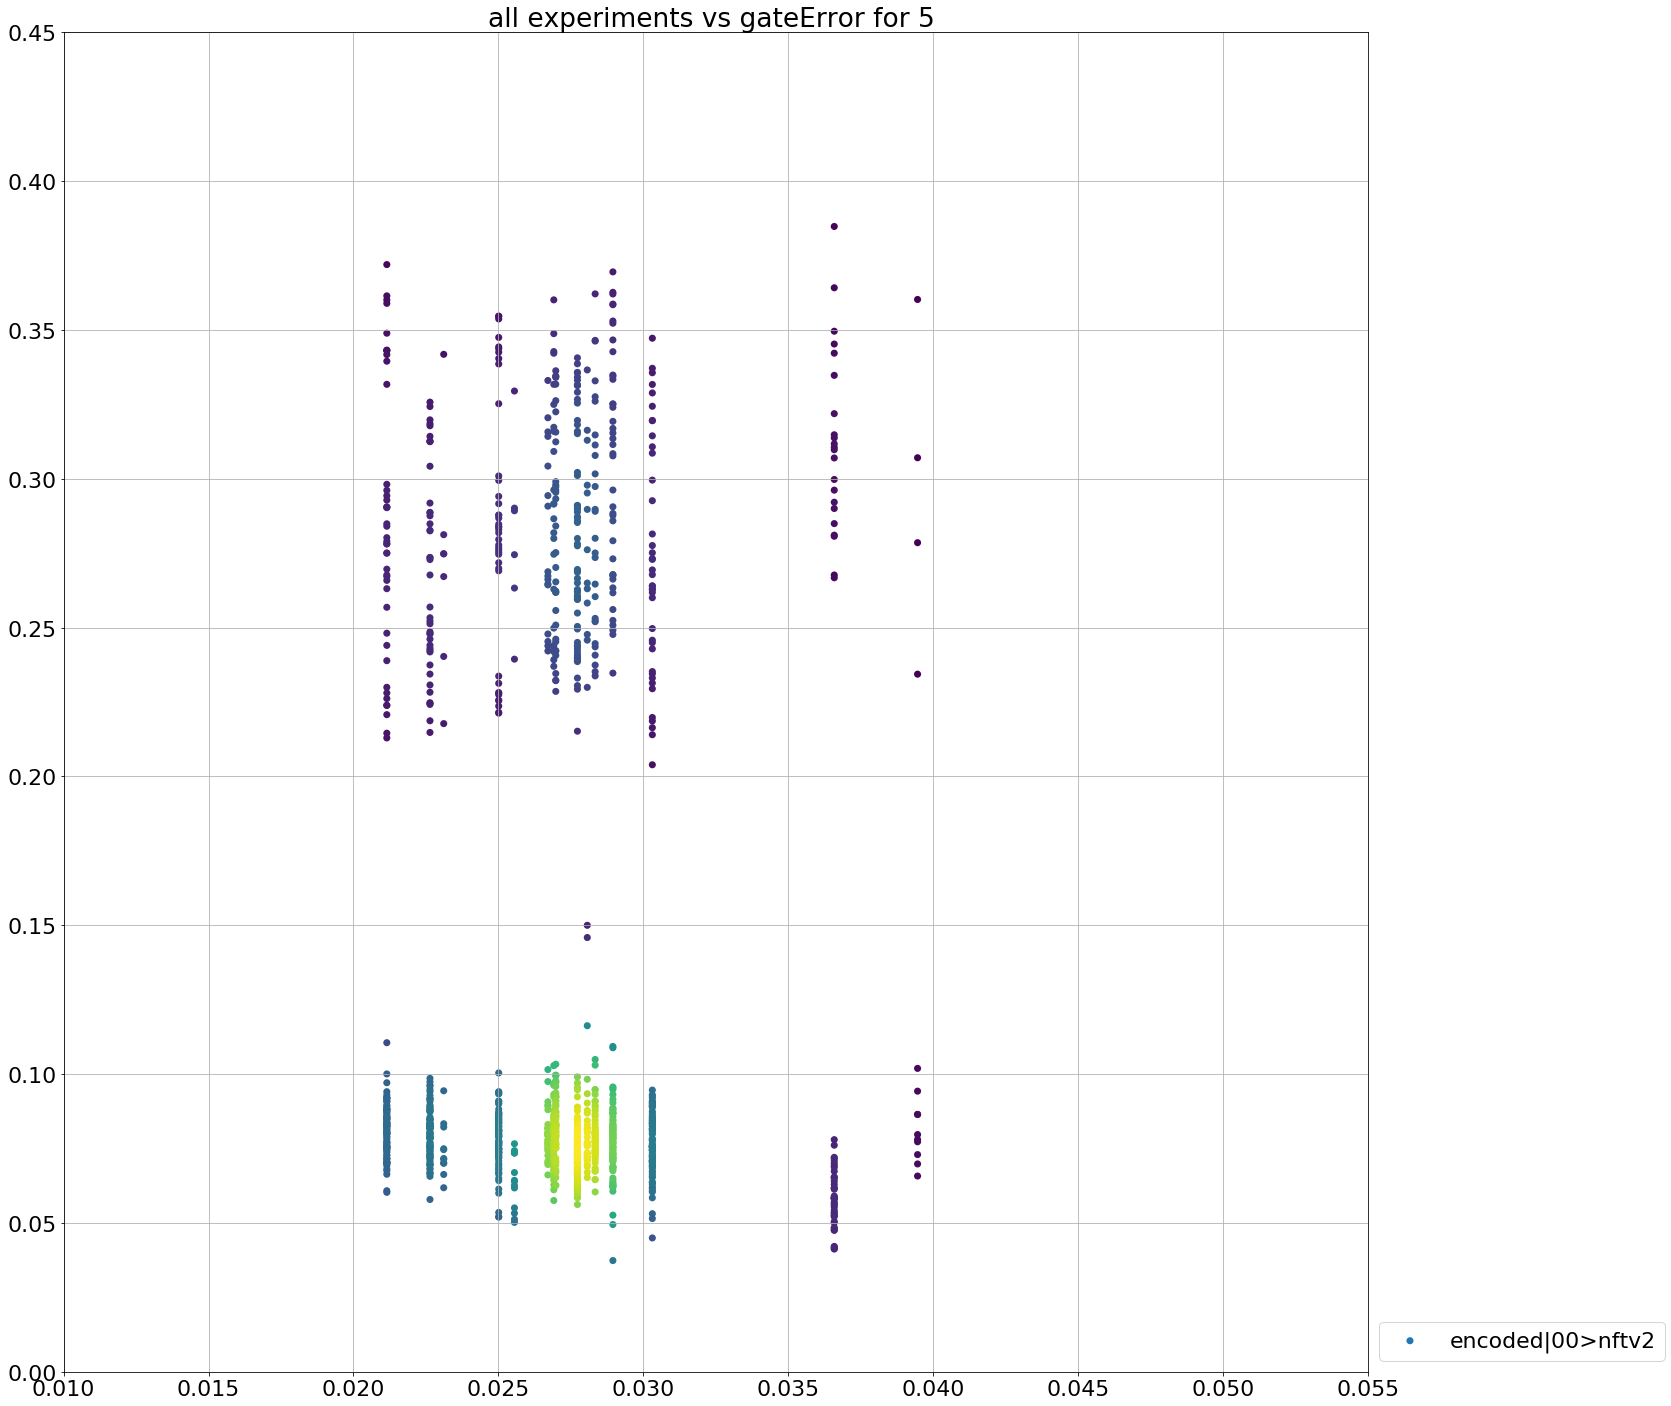

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [27]:
plottool.plot_everything_calib_data('data/Processed_data/', 5, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.055], 
                                    y_range=[0,0.45],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [9]])

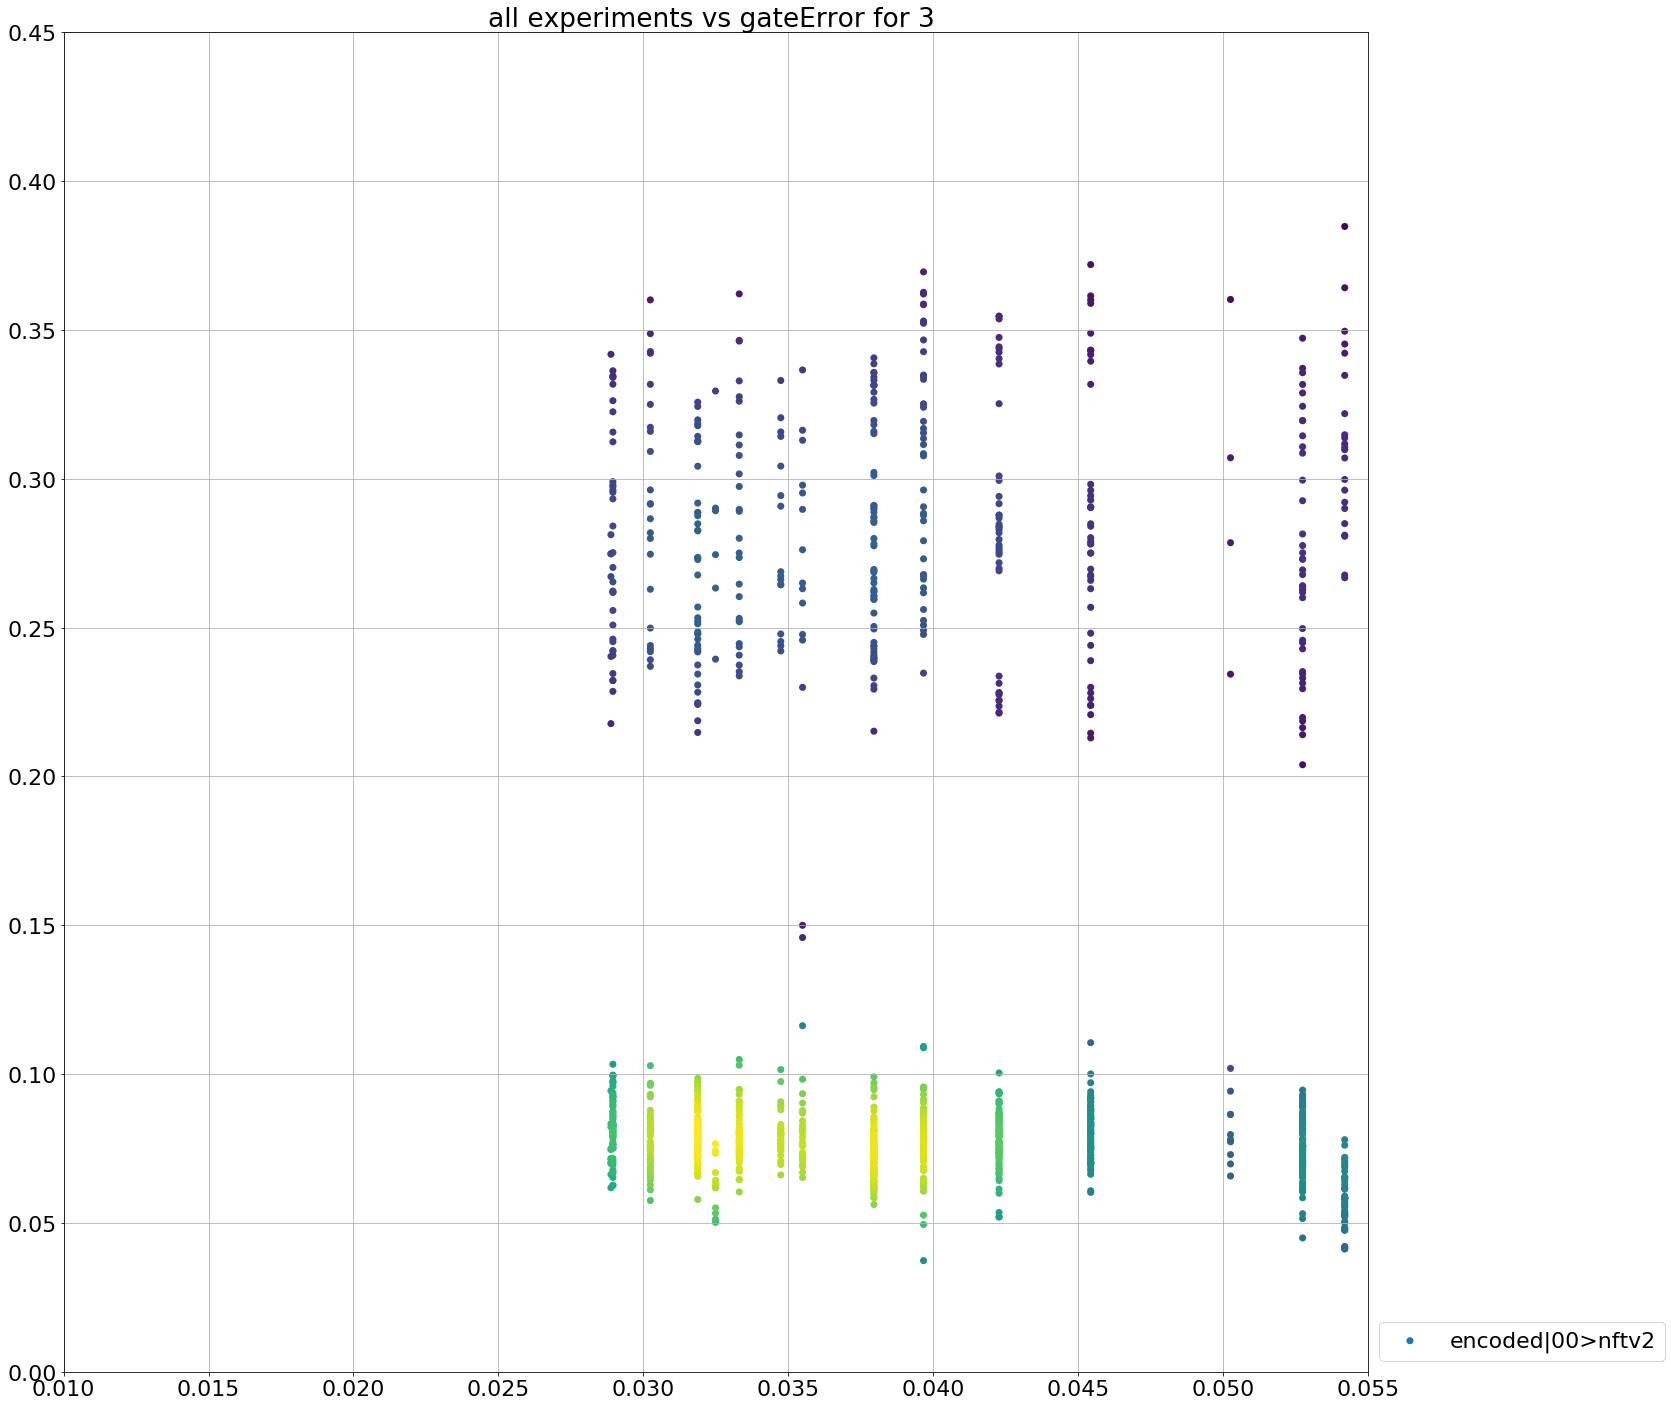

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [30]:
plottool.plot_everything_calib_data('data/Processed_data/', 3, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.055], 
                                    y_range=[0,0.45],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [9]])

In [113]:
z = zip(*sorted(zip([7,6,7],[4,5,3],[7,8,9])))

In [114]:
for e in z:
    print(e)

(6, 7, 7)
(5, 3, 4)
(8, 9, 7)


In [124]:
max(*[6,7,8])

8

In [174]:
for j,cn in enumerate(exptool.CIRCUIT_NAMES):
    print('{} {}'.format(j+1,cn[1:]))

1 |00>
2 |0+>
3 X2|00>
4 X1|00>
5 |00>+|11>
6 Z2|0+>
7 HHS|00>
8 X1|0+>
9 X2-X1|00>
10 Z2|00>+|11>
11 X1|00>+|11>
12 Z2-HHS|00>
13 Z1-HHS|00>
14 Z2-X1|0+>
15 X2-Z2|00>+|11>
16 Z2-Z1-HHS|00>
17 CZ-HHS|00>
18 CZ-Z2-HHS|00>
19 CZ-Z1-HHS|00>
20 X2-CZ-HHS-X1|00>


In [53]:
importlib.reload(exptool)
importlib.reload(plottool)

<module 'tools.Ploting_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Ploting_tools.py'>

In [54]:
plottool.save_everything_calib_data_avg('data/Processed_data/', 'data/Table_data/')

0 27398


## Old parameters (on sparrow)

In [66]:
import statistics
from statsmodels.stats.weightstats import DescrStatsW
num_runs = [9, 12, 5, 10]
total_runs = sum(num_runs)
1/total_runs*sum([w*e for w,e in zip(num_runs,[1,2,3,4])])

weighted_stats = DescrStatsW([103.8,93.8,85.8,77.6], weights=num_runs, ddof=0)
print(weighted_stats.std)
print(weighted_stats.mean)
print(statistics.stdev(weighted_stats.asrepeats()))
print(statistics.mean(weighted_stats.asrepeats()))

9.85443435937
90.6888888889
9.994220552121334
90.6888888889


T1

In [45]:
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[33.9,56.4,47.9,52.8])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[54.5,32.8,41.1,58.3])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[58.2,54.5,56.1,54.1])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[54.9,47.2,46.4,41.6])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[46,58.2,64.4,55.7])]))

48.59444444444444
46.46111111111111
55.53611111111111
47.45833333333333
55.31666666666666


In [68]:
weighted_stats = DescrStatsW([33.9,56.4,47.9,52.8], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([54.5,32.8,41.1,58.3], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([58.2,54.5,56.1,54.1], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([54.9,47.2,46.4,41.6], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([46,58.2,64.4,55.7], weights=num_runs, ddof=0)
print(weighted_stats.std)

8.90339961427
11.0131557133
1.65800294494
4.85342805539
5.99761526683


T2

In [69]:
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[35.1,36.4,41.4,45.9])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[50.7,21.6,35.3,51.1])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[103.8,93.8,85.8,77.6])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[82.4,58.8,50.2,54.1])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[59.9,86.9,100.1,82.2])]))

39.40833333333333
38.97222222222222
90.68888888888888
62.19999999999999
80.67777777777778


In [70]:
weighted_stats = DescrStatsW([35.1,36.4,41.4,45.9], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([50.7,21.6,35.3,51.1], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([103.8,93.8,85.8,77.6], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([82.4,58.8,50.2,54.1], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([59.9,86.9,100.1,82.2], weights=num_runs, ddof=0)
print(weighted_stats.std)

4.4625213974
13.3308875072
9.85443435937
12.0036799913
13.1859797409


gateError

In [71]:
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[.24,.23,.21,.23])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[.23,.42,.35,.19])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[.57,.37,.37,.38])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[.87,.33,.4,.476])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[.37,.33,.28,.33])]))

0.2297222222222222
0.29888888888888887
0.4227777777777777
0.5152777777777777
0.33305555555555555


In [72]:
weighted_stats = DescrStatsW([.24,.23,.21,.23], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([.23,.42,.35,.19], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([.57,.37,.37,.38], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([.87,.33,.4,.476], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([.37,.33,.28,.33], weights=num_runs, ddof=0)
print(weighted_stats.std)

0.00897097514553
0.0986514002203
0.0851016095654
0.212541317697
0.0271640534985


readoutError

In [73]:
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[1.7,2,1.5,2.1])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[10.9,6.3,5.3,9.7])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[1.8,1.6,1,1.2])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[16.8,12.5,4.8,11.7])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[7.4,7.1,5.2,5.8])]))

1.883333333333333
8.255555555555555
1.4555555555555557
12.283333333333333
6.55


In [74]:
weighted_stats = DescrStatsW([1.7,2,1.5,2.1], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([10.9,6.3,5.3,9.7], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([1.8,1.6,1,1.2], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([16.8,12.5,4.8,11.7], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([7.4,7.1,5.2,5.8], weights=num_runs, ddof=0)
print(weighted_stats.std)

0.215380799722
2.19449367033
0.289102485139
3.60389449839
0.831163842653


Two qubit gates

In [75]:
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[3.74,5.02,3.65,3.23])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[2.58,3.17,3.15,3.02])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[4.01,5.82,3.97,3.98])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[3.62,3.47,3.26,4.19])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[6.94,5.19,5.46,7.15])]))
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[8.9,3.66,4.42,6.11])]))

4.012499999999999
2.9780555555555552
4.599444444444444
3.6783333333333337
6.209444444444444
5.756111111111111


In [76]:
weighted_stats = DescrStatsW([3.74,5.02,3.65,3.23], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([2.58,3.17,3.15,3.02], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([4.01,5.82,3.97,3.98], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([3.62,3.47,3.26,4.19], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([6.94,5.19,5.46,7.15], weights=num_runs, ddof=0)
print(weighted_stats.std)
weighted_stats = DescrStatsW([8.9,3.66,4.42,6.11], weights=num_runs, ddof=0)
print(weighted_stats.std)

0.73841186565
0.237671802708
0.863169046288
0.335182371586
0.8964341224
2.0538504189


Fridge

In [77]:
print(1/total_runs*sum([w*e for w,e in zip(num_runs,[0.018439,0.019558,0.019102,0.017421])]))
weighted_stats = DescrStatsW([0.018439,0.019558,0.019102,0.017421], weights=num_runs, ddof=0)
print(weighted_stats.std)

0.018621305555555554
0.000856195487136


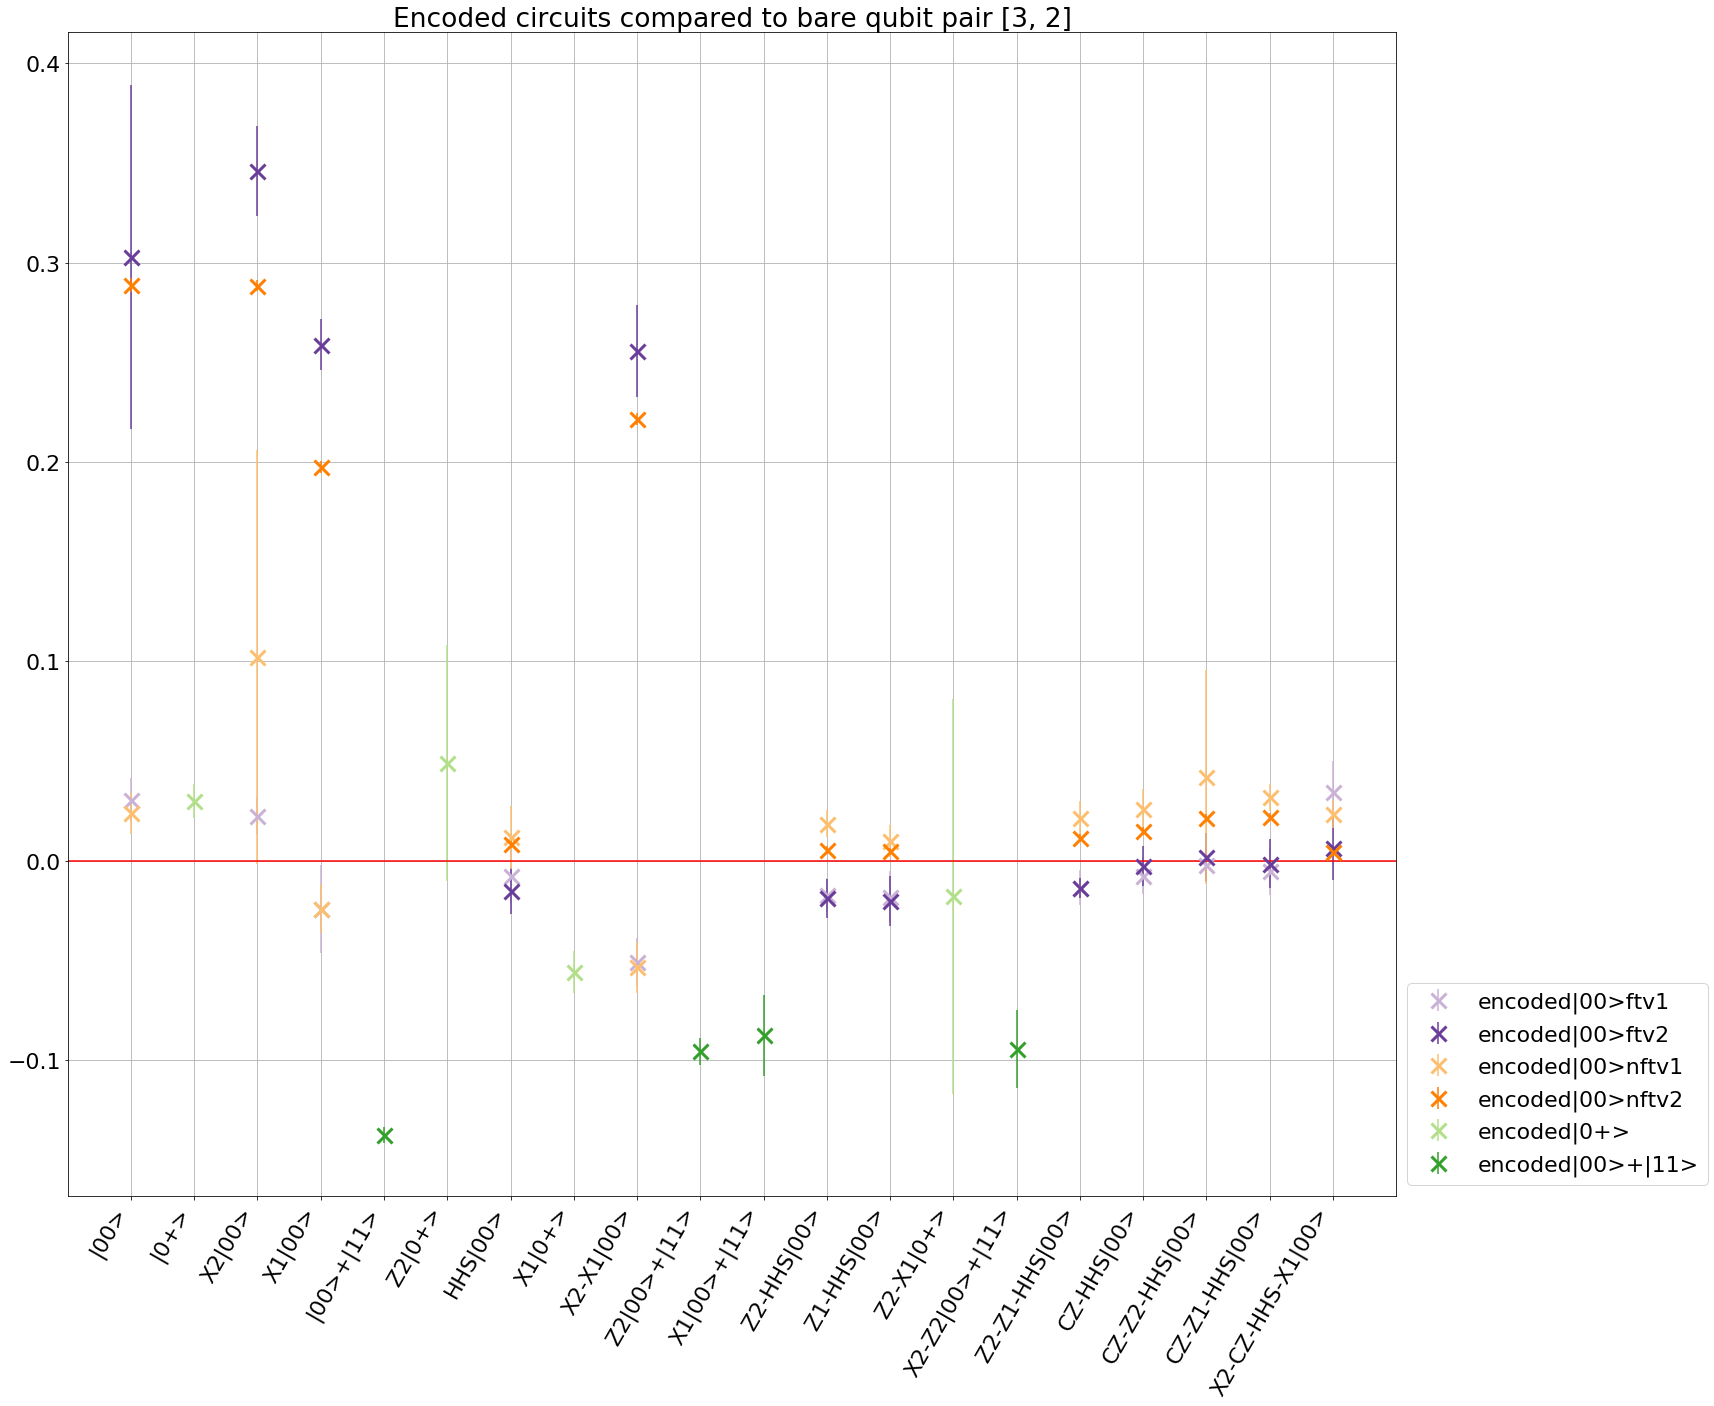

0 6894
bare[1, 0] 0.14686741230842182
bare[2, 0] 0.07081372102637465
bare[2, 1] 0.1219130194061627
bare[2, 4] 0.09490102819043547
bare[3, 2] 0.08819764841068059
bare[3, 4] 0.08591113836115057
encoded|00>ftv1 -0.004825843571706818
encoded|00>ftv2 0.09170479205097513
encoded|00>nftv1 0.019463498131926882
encoded|00>nftv2 0.09077667611734652
encoded|0+> 0.0013673413222021532
encoded|00>+|11> -0.10368763689117351


In [19]:
importlib.reload(exptool)
importlib.reload(plottool)
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plottool.plot_everything_averaged_diff('data/Processed_data_verif_nftv2/', save_data_folder_pref='data/Plot_data_verif_nftv2/',
                                 logscaley=False,
                                 bareindex=4,
                                 ci=.99)

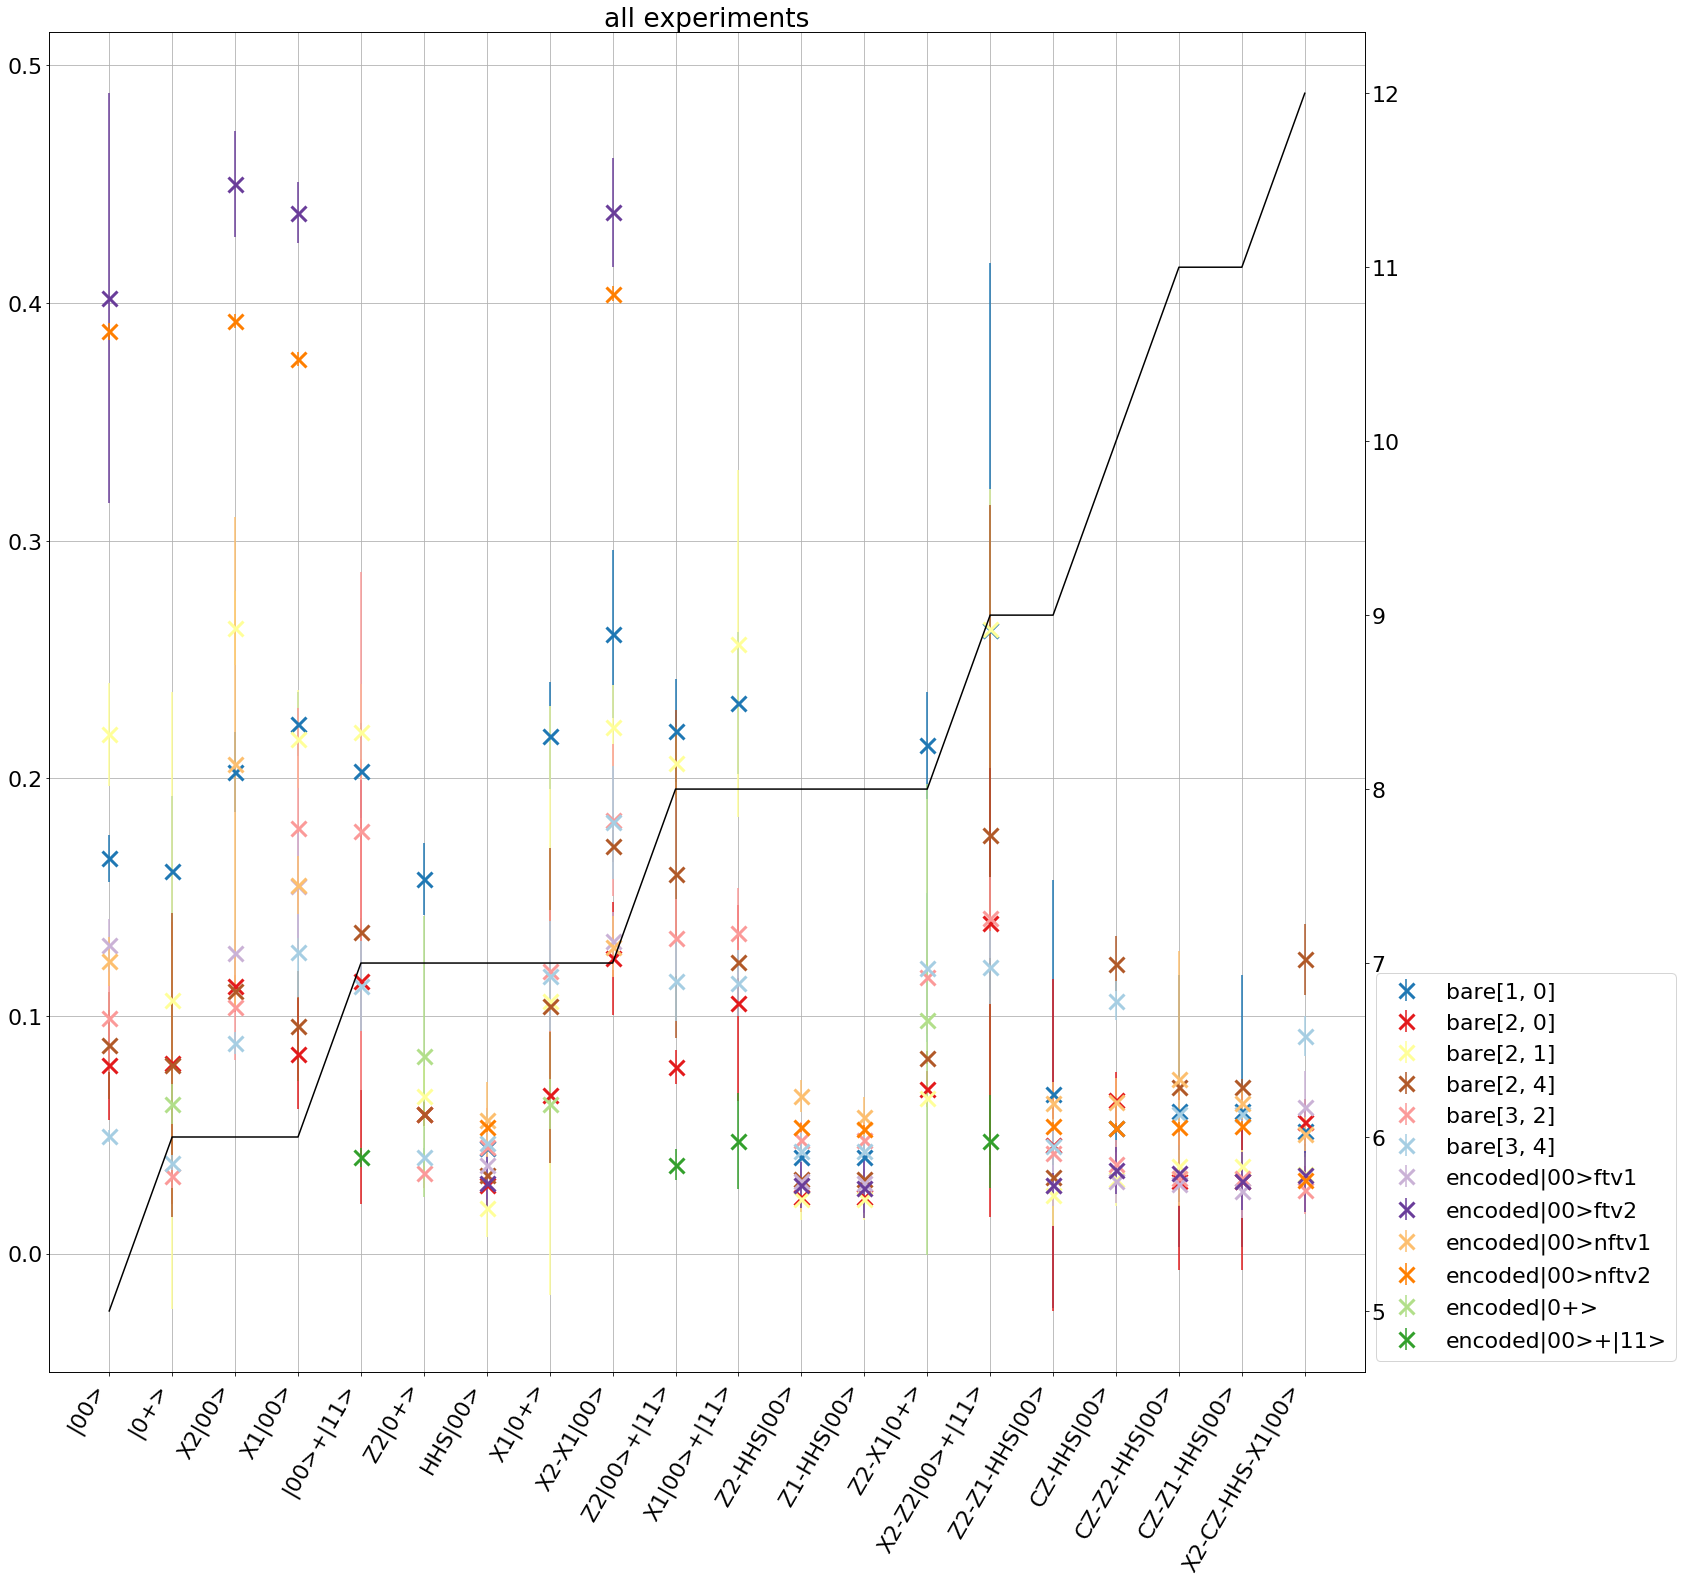

0 6894
bare[1, 0] 0.14686741230842182
bare[2, 0] 0.07081372102637465
bare[2, 1] 0.1219130194061627
bare[2, 4] 0.09490102819043547
bare[3, 2] 0.08819764841068059
bare[3, 4] 0.08591113836115057
encoded|00>ftv1 0.0680865703319505
encoded|00>ftv2 0.16461720595463245
encoded|00>nftv1 0.09237591203558419
encoded|00>nftv2 0.16368909002100382
encoded|0+> 0.07680104763054225
encoded|00>+|11> 0.0431296571429174


In [20]:
plottool.plot_everything_averaged('data/Processed_data_verif_nftv2/', save_data_folder_pref='data/Plot_data_verif_nftv2/',
                                 logscaley=False,
                                 sublabels=plottool.PLOT_LABELS,
                                 ci=.99)

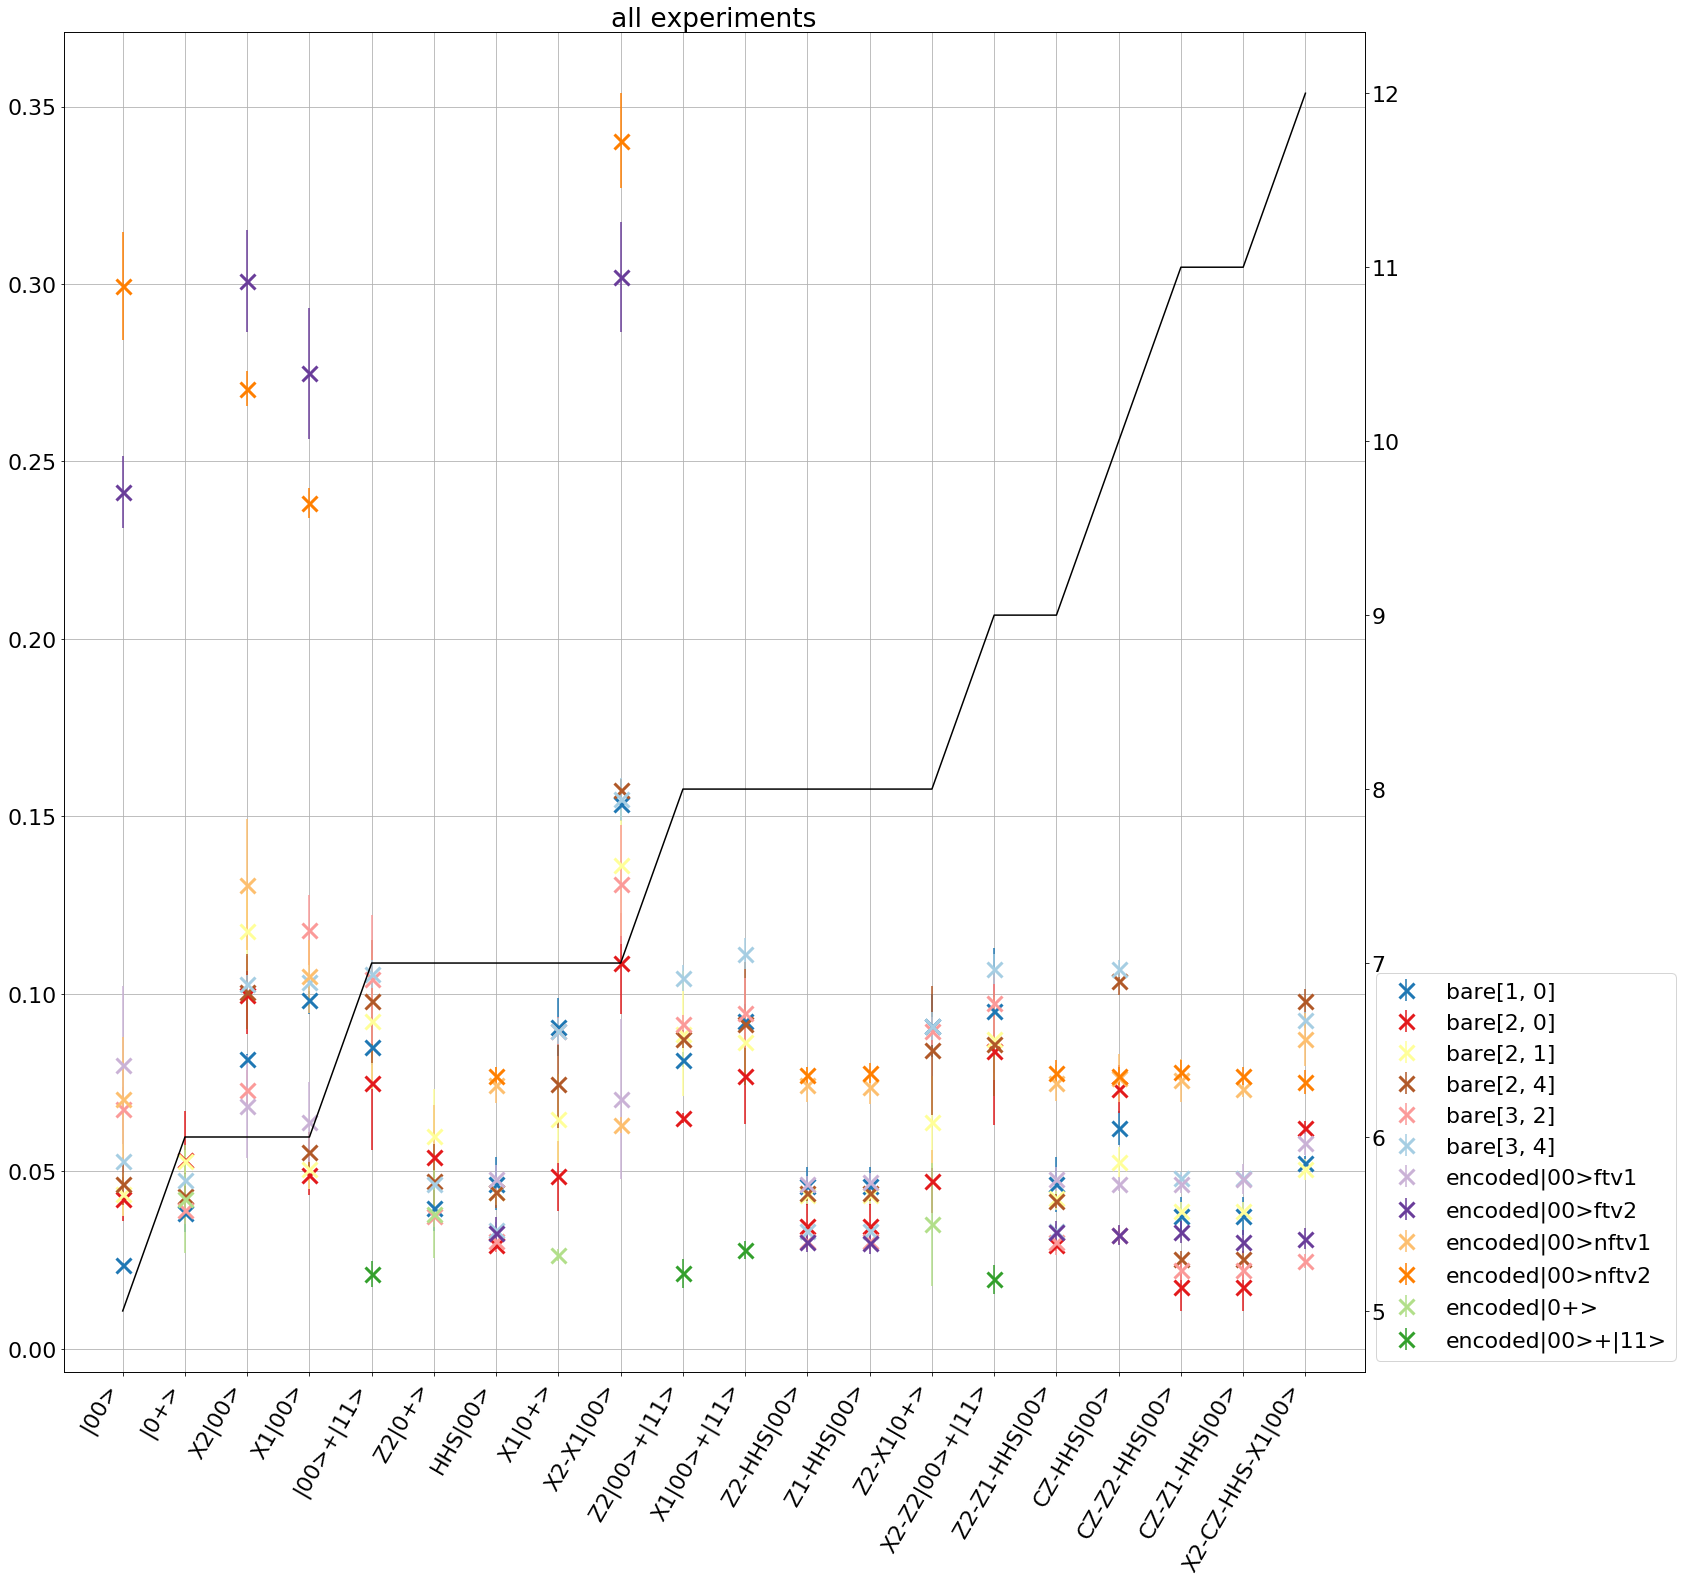

0 27398

Average performance:

bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998
encoded|00>ftv1 0.05585260583230345
encoded|00>ftv2 0.11420843349291593
encoded|00>nftv1 0.08156724788026726
encoded|00>nftv2 0.14708291703525392
encoded|0+> 0.035389089858050844
encoded|00>+|11> 0.0223935081476726

Post selection ratios:

encoded|00>ftv1 0.6467531826829663
encoded|00>ftv2 0.44361300295498707
encoded|00>nftv1 0.7084630103444985
encoded|00>nftv2 0.5126047962116745


In [41]:
plottool.plot_everything_averaged('data/Processed_data/', save_data_folder_pref=None,
                                 logscaley=False,
                                 sublabels=[plottool.PLOT_LABELS[j] for j in [0,1,2,3,4,5,6,7,8,9,10,11]],
                                 ci=.99)

In [40]:
importlib.reload(exptool)
importlib.reload(plottool)
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

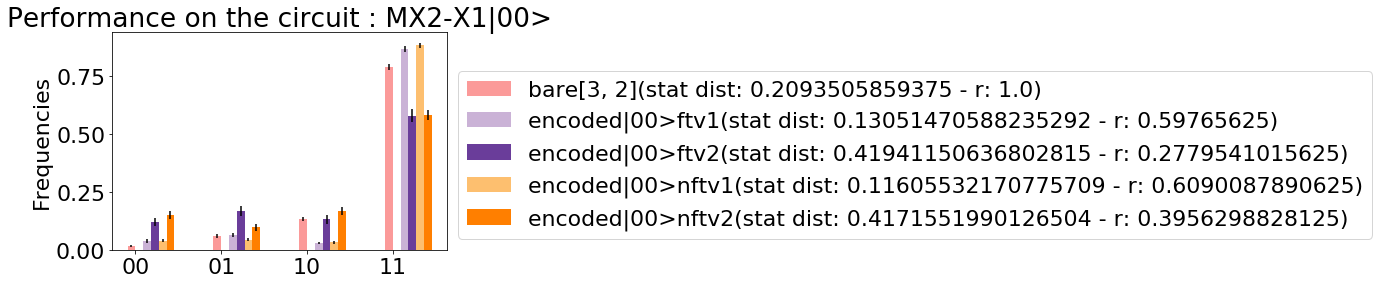

In [59]:
plottool.plot_one_random_expe('data/Processed_data_verif_nftv2/', 'MX2-X1|00>', deselect_labels=[0,1,2,3,5])

In [20]:
weights = [12, 4, 4]
ftv1mean = [0.05585260583230345, 0.035389089858050844, 0.0223935081476726]
ftv2mean = [0.11420843349291593, 0.035389089858050844, 0.0223935081476726]
nftv1mean = [0.08156724788026726, 0.035389089858050844, 0.0223935081476726]
nftv2mean = [0.14708291703525392, 0.035389089858050844, 0.0223935081476726]
print(sum([weights[j]*ftv1mean[j] for j in [0,1,2]])/20)
print(sum([weights[j]*ftv2mean[j] for j in [0,1,2]])/20)
print(sum([weights[j]*nftv1mean[j] for j in [0,1,2]])/20)
print(sum([weights[j]*nftv2mean[j] for j in [0,1,2]])/20)





0.045068083100526755
0.08008157969689425
0.060496868329305044
0.09980626982229704


In [17]:
#verif nftv2 numbers
weights = [12, 4, 4]
ftv1mean = [0.0680865703319505, 0.07680104763054225, 0.0431296571429174]
ftv2mean = [0.16461720595463245, 0.07680104763054225, 0.0431296571429174]
nftv1mean = [0.09237591203558419, 0.07680104763054225, 0.0431296571429174]
nftv2mean = [0.16368909002100382, 0.07680104763054225, 0.0431296571429174]
print(sum([weights[j]*ftv1mean[j] for j in [0,1,2]])/20)
print(sum([weights[j]*ftv2mean[j] for j in [0,1,2]])/20)
print(sum([weights[j]*nftv1mean[j] for j in [0,1,2]])/20)
print(sum([weights[j]*nftv2mean[j] for j in [0,1,2]])/20)



0.06483808315386222
0.1227564645274714
0.07941168817604244
0.12219959496729423


In [34]:
[1,2,3]+[2,3]

[1, 2, 3, 2, 3]